# Mobile Price Classification - Kelompok BicaraData

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from matplotlib import rcParams
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pd.set_option('display.max_columns', None)

rcParams['figure.figsize'] = 20, 8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Data Import and General Information

In [2]:
#import data train
dftrain = pd.read_csv('train.csv')
dftrain.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [3]:
#general overview data
dftrain = pd.read_csv('train.csv')
display(dftrain.sample(5))
print(dftrain.shape)
print(dftrain.info())
print(dftrain.duplicated().sum())

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
739            1303     0          1.0         1   0       1          15   
676            1027     0          0.5         0   2       1          64   
1184           1314     1          2.2         0   0       1          40   
1870           1234     0          1.7         1   8       0          17   
324            1698     0          2.1         0   5       1          18   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
739     0.1        138        3  10        229      1604  2574    12     4   
676     0.9        103        2   7       1698      1747  3786    17    12   
1184    0.8        116        7   1        328      1858  3033     9     8   
1870    0.9        174        6  15        209       725  3351    12     9   
324     0.9        160        6  20        363       994   796    13     3   

      talk_time  three_g  touch_screen  wifi  price_range  
739          14        1             1     1            2  
676          12        1             0     0            3  
1184         17        1             1     1            3  
1870         19        0             0     1            2  
324          14        1             0     1            0

(2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 1

Hal yang terlihat sejauh ini:
* 2000 baris, 21 kolom
* Tidak ada data `NULL`
* Tidak ada data duplikat
* feature blue, dual_sim, four_g , three_g, touch_screen, wifi, price_range adalah category dan sisanya numeric

In [4]:
#renaming the column agar dalam pemprosesan data selanjutnya gampang untuk dipahami dan dijelaskan

dftrain= dftrain.rename({'id':'Id','battery_power':'Battery_Power','blue':'Bluetooth','clock_speed':'Processor_Clock_Speed','dual_sim':'Dual_Sim',\
                                         'fc':'Front_Camera(MP)','four_g':'4G_Connection','int_memory':'Internal_Memory(GB)','m_dep':'Depth(cm)','mobile_wt':'Weight',\
                                         'n_cores':'Processor_Cores','pc':'Primary_Camera(MP)','px_height':'Pixel_Resolution_Height','px_width':'Pixel_Resolution_Width',\
                                         'ram':'RAM(MB)','sc_h':'Screen_Height(cm)','sc_w':'Screen_Width(cm)','talk_time':'Talk_Time','three_g':'3G_Connection','touch_screen':'Touch_Screen',
                                         'wifi':'Wifi'}, axis = 1)
df_original = dftrain.copy()

In [5]:
#check rename
dftrain.sample(3)

Battery_Power  Bluetooth  Processor_Clock_Speed  Dual_Sim  \
741            1972          0                    1.2         1   
1835           1680          1                    1.2         1   
856             994          1                    2.8         1   

      Front_Camera(MP)  4G_Connection  Internal_Memory(GB)  Depth(cm)  Weight  \
741                  0              0                   37        0.7     102   
1835                 6              1                   37        0.7     168   
856                  0              0                   56        0.5     173   

      Processor_Cores  Primary_Camera(MP)  Pixel_Resolution_Height  \
741                 2                   1                      715   
1835                4                   7                      679   
856                 3                   3                      491   

      Pixel_Resolution_Width  RAM(MB)  Screen_Height(cm)  Screen_Width(cm)  \
741                     1648     2870                 16                 0   
1835                    1231     1459                 15                 3   
856                      530     3190                  5                 2   

      Talk_Time  3G_Connection  Touch_Screen  Wifi  price_range  
741          17              0             0     0            3  
1835          2              1             1     0            1  
856          20              1             1     1            2

In [5]:
#lihat value unique pada tiap kolom
def column_unique(dataframe):
    for i in dataframe.columns:
        print('Total unique value in',i,'column',len(dataframe[i].unique()))
        print('----')
        
column_unique(dftrain)

Total unique value in Battery_Power column 1094
----
Total unique value in Bluetooth column 2
----
Total unique value in Processor_Clock_Speed column 26
----
Total unique value in Dual_Sim column 2
----
Total unique value in Front_Camera(MP) column 20
----
Total unique value in 4G_Connection column 2
----
Total unique value in Internal_Memory(GB) column 63
----
Total unique value in Depth(cm) column 10
----
Total unique value in Weight column 121
----
Total unique value in Processor_Cores column 8
----
Total unique value in Primary_Camera(MP) column 21
----
Total unique value in Pixel_Resolution_Height column 1137
----
Total unique value in Pixel_Resolution_Width column 1109
----
Total unique value in RAM(MB) column 1562
----
Total unique value in Screen_Height(cm) column 15
----
Total unique value in Screen_Width(cm) column 19
----
Total unique value in Talk_Time column 19
----
Total unique value in 3G_Connection column 2
----
Total unique value in Touch_Screen column 2
----
Total uni

yang terlihat pada data diatas yaitu :
* kolom Bluetooth, Dual_Sim, 4G_Connection, 3G_Connection, Touch_Screen, Wifi bertipe boolean
* kolom price_range bertipe kategori
* sisa dari kolom diatas adalah numeric

# Exploratory Data Analysis

## Univariate Analysis

In [6]:
#deskripsi dasar data

display(dftrain.info())
display(dftrain.describe())
display(dftrain.sample(10))

def column_unique(dataframe):
    for i in dataframe.columns:
        print('Total unique value in',i,'column',len(dataframe[i].unique()))
        print('----')
        
column_unique(dftrain)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Battery_Power            2000 non-null   int64  
 1   Bluetooth                2000 non-null   int64  
 2   Processor_Clock_Speed    2000 non-null   float64
 3   Dual_Sim                 2000 non-null   int64  
 4   Front_Camera(MP)         2000 non-null   int64  
 5   4G_Connection            2000 non-null   int64  
 6   Internal_Memory(GB)      2000 non-null   int64  
 7   Depth(cm)                2000 non-null   float64
 8   Weight                   2000 non-null   int64  
 9   Processor_Cores          2000 non-null   int64  
 10  Primary_Camera(MP)       2000 non-null   int64  
 11  Pixel_Resolution_Height  2000 non-null   int64  
 12  Pixel_Resolution_Width   2000 non-null   int64  
 13  RAM(MB)                  2000 non-null   int64  
 14  Screen_Height(cm)       

None

Battery_Power  Bluetooth  Processor_Clock_Speed     Dual_Sim  \
count    2000.000000  2000.0000            2000.000000  2000.000000   
mean     1238.518500     0.4950               1.522250     0.509500   
std       439.418206     0.5001               0.816004     0.500035   
min       501.000000     0.0000               0.500000     0.000000   
25%       851.750000     0.0000               0.700000     0.000000   
50%      1226.000000     0.0000               1.500000     1.000000   
75%      1615.250000     1.0000               2.200000     1.000000   
max      1998.000000     1.0000               3.000000     1.000000   

       Front_Camera(MP)  4G_Connection  Internal_Memory(GB)    Depth(cm)  \
count       2000.000000    2000.000000          2000.000000  2000.000000   
mean           4.309500       0.521500            32.046500     0.501750   
std            4.341444       0.499662            18.145715     0.288416   
min            0.000000       0.000000             2.000000     0.100000   
25%            1.000000       0.000000            16.000000     0.200000   
50%            3.000000       1.000000            32.000000     0.500000   
75%            7.000000       1.000000            48.000000     0.800000   
max           19.000000       1.000000            64.000000     1.000000   

            Weight  Processor_Cores  Primary_Camera(MP)  \
count  2000.000000      2000.000000         2000.000000   
mean    140.249000         4.520500            9.916500   
std      35.399655         2.287837            6.064315   
min      80.000000         1.000000            0.000000   
25%     109.000000         3.000000            5.000000   
50%     141.000000         4.000000           10.000000   
75%     170.000000         7.000000           15.000000   
max     200.000000         8.000000           20.000000   

       Pixel_Resolution_Height  Pixel_Resolution_Width      RAM(MB)  \
count              2000.000000             2000.000000  2000.000000   
mean                645.108000             1251.515500  2124.213000   
std                 443.780811              432.199447  1084.732044   
min                   0.000000              500.000000   256.000000   
25%                 282.750000              874.750000  1207.500000   
50%                 564.000000             1247.000000  2146.500000   
75%                 947.250000             1633.000000  3064.500000   
max                1960.000000             1998.000000  3998.000000   

       Screen_Height(cm)  Screen_Width(cm)    Talk_Time  3G_Connection  \
count        2000.000000       2000.000000  2000.000000    2000.000000   
mean           12.306500          5.767000    11.011000       0.761500   
std             4.213245          4.356398     5.463955       0.426273   
min             5.000000          0.000000     2.000000       0.000000   
25%             9.000000          2.000000     6.000000       1.000000   
50%            12.000000          5.000000    11.000000       1.000000   
75%            16.000000          9.000000    16.000000       1.000000   
max            19.000000         18.000000    20.000000       1.000000   

       Touch_Screen         Wifi  price_range  
count   2000.000000  2000.000000  2000.000000  
mean       0.503000     0.507000     1.500000  
std        0.500116     0.500076     1.118314  
min        0.000000     0.000000     0.000000  
25%        0.000000     0.000000     0.750000  
50%        1.000000     1.000000     1.500000  
75%        1.000000     1.000000     2.250000  
max        1.000000     1.000000     3.000000

Battery_Power  Bluetooth  Processor_Clock_Speed  Dual_Sim  \
1252            917          1                    0.5         0   
438             853          1                    2.0         0   
344             618          0                    2.1         0   
1449            602          0                    0.9         0   
257             507          1                    0.5         1   
960            1596          0                    2.9         1   
600            1170          0                    2.9         1   
871             712          1                    1.6         0   
1629           1232          0                    1.2         0   
1792           1777          0                    2.2         1   

      Front_Camera(MP)  4G_Connection  Internal_Memory(GB)  Depth(cm)  Weight  \
1252                 1              1                   31        0.5      88   
438                 10              1                    3        0.6     200   
344                  2              0                    6        0.3      86   
1449                 9              0                   50        0.9     141   
257                  1              0                   32        0.5     141   
960                  7              0                    7        0.7     149   
600                  2              0                   40        0.4     169   
871                  6              1                    9        0.8     172   
1629                12              0                   30        0.9     131   
1792                 0              0                   15        0.2     100   

      Processor_Cores  Primary_Camera(MP)  Pixel_Resolution_Height  \
1252                6                   2                      423   
438                 2                  16                      674   
344                 1                   4                     1314   
1449                8                  18                     1571   
257                 7                  11                      936   
960                 2                   9                      169   
600                 6                   5                      427   
871                 2                  14                      881   
1629                6                  14                      625   
1792                4                   7                      553   

      Pixel_Resolution_Width  RAM(MB)  Screen_Height(cm)  Screen_Width(cm)  \
1252                     909     3424                 19                 2   
438                      740     3701                 15                 8   
344                     1688     1051                 13                10   
1449                    1717     2189                  7                 5   
257                     1398     1702                 17                 0   
960                     1190     2493                 14                12   
600                      684     2366                 16                 8   
871                     1234     3612                 13                 5   
1629                     761     1656                  8                 4   
1792                     874     1552                 10                 8   

      Talk_Time  3G_Connection  Touch_Screen  Wifi  price_range  
1252         13              1             1     0            3  
438           8              1             1     0            3  
344          15              0             0     1            0  
1449         16              0             1     0            2  
257           5              1             1     1            1  
960          13              1             1     1            2  
600           2              1             1     1            1  
871           4              1             0     0            3  
1629         15              1             1     1            1  
1792         10              1             1     0            1

Total unique value in Battery_Power column 1094
----
Total unique value in Bluetooth column 2
----
Total unique value in Processor_Clock_Speed column 26
----
Total unique value in Dual_Sim column 2
----
Total unique value in Front_Camera(MP) column 20
----
Total unique value in 4G_Connection column 2
----
Total unique value in Internal_Memory(GB) column 63
----
Total unique value in Depth(cm) column 10
----
Total unique value in Weight column 121
----
Total unique value in Processor_Cores column 8
----
Total unique value in Primary_Camera(MP) column 21
----
Total unique value in Pixel_Resolution_Height column 1137
----
Total unique value in Pixel_Resolution_Width column 1109
----
Total unique value in RAM(MB) column 1562
----
Total unique value in Screen_Height(cm) column 15
----
Total unique value in Screen_Width(cm) column 19
----
Total unique value in Talk_Time column 19
----
Total unique value in 3G_Connection column 2
----
Total unique value in Touch_Screen column 2
----
Total uni

Dari data numeric diatas yang terlihat sejauh ini:

* 2000 baris, 19 kolom
* Tidak ada nilai `NULL`
* Kolom Bluetooth, Dual_Sim, 4G_Connection, 3G_Connection, Touch_Screen, Wifi bertipe boolean, nilai hanya 0-1, kolom price_range  adalah kategori (target) dan yang lainnya adalah numeric.
* tidak ada feature yang terindikasi skewed ( jarak mean denn median tidak jauh)


In [7]:
#pisahkan feature menjadi kategori dan numeric

cats = ['Bluetooth','Dual_Sim','4G_Connection','3G_Connection','Touch_Screen','Wifi','price_range']
nums = ['Battery_Power','Processor_Clock_Speed','Front_Camera(MP)','Internal_Memory(GB)','Depth(cm)','Weight','Processor_Cores','Primary_Camera(MP)'
       ,'RAM(MB)','Talk_Time','Pixel_Resolution_Height','Pixel_Resolution_Width','Screen_Height(cm)','Screen_Width(cm)']

In [8]:
#statistical summary
display(dftrain[nums].describe())
display(dftrain[cats].describe())

Battery_Power  Processor_Clock_Speed  Front_Camera(MP)  \
count    2000.000000            2000.000000       2000.000000   
mean     1238.518500               1.522250          4.309500   
std       439.418206               0.816004          4.341444   
min       501.000000               0.500000          0.000000   
25%       851.750000               0.700000          1.000000   
50%      1226.000000               1.500000          3.000000   
75%      1615.250000               2.200000          7.000000   
max      1998.000000               3.000000         19.000000   

       Internal_Memory(GB)    Depth(cm)       Weight  Processor_Cores  \
count          2000.000000  2000.000000  2000.000000      2000.000000   
mean             32.046500     0.501750   140.249000         4.520500   
std              18.145715     0.288416    35.399655         2.287837   
min               2.000000     0.100000    80.000000         1.000000   
25%              16.000000     0.200000   109.000000         3.000000   
50%              32.000000     0.500000   141.000000         4.000000   
75%              48.000000     0.800000   170.000000         7.000000   
max              64.000000     1.000000   200.000000         8.000000   

       Primary_Camera(MP)      RAM(MB)    Talk_Time  Pixel_Resolution_Height  \
count         2000.000000  2000.000000  2000.000000              2000.000000   
mean             9.916500  2124.213000    11.011000               645.108000   
std              6.064315  1084.732044     5.463955               443.780811   
min              0.000000   256.000000     2.000000                 0.000000   
25%              5.000000  1207.500000     6.000000               282.750000   
50%             10.000000  2146.500000    11.000000               564.000000   
75%             15.000000  3064.500000    16.000000               947.250000   
max             20.000000  3998.000000    20.000000              1960.000000   

       Pixel_Resolution_Width  Screen_Height(cm)  Screen_Width(cm)  
count             2000.000000        2000.000000       2000.000000  
mean              1251.515500          12.306500          5.767000  
std                432.199447           4.213245          4.356398  
min                500.000000           5.000000          0.000000  
25%                874.750000           9.000000          2.000000  
50%               1247.000000          12.000000          5.000000  
75%               1633.000000          16.000000          9.000000  
max               1998.000000          19.000000         18.000000

Bluetooth     Dual_Sim  4G_Connection  3G_Connection  Touch_Screen  \
count  2000.0000  2000.000000    2000.000000    2000.000000   2000.000000   
mean      0.4950     0.509500       0.521500       0.761500      0.503000   
std       0.5001     0.500035       0.499662       0.426273      0.500116   
min       0.0000     0.000000       0.000000       0.000000      0.000000   
25%       0.0000     0.000000       0.000000       1.000000      0.000000   
50%       0.0000     1.000000       1.000000       1.000000      1.000000   
75%       1.0000     1.000000       1.000000       1.000000      1.000000   
max       1.0000     1.000000       1.000000       1.000000      1.000000   

              Wifi  price_range  
count  2000.000000  2000.000000  
mean      0.507000     1.500000  
std       0.500076     1.118314  
min       0.000000     0.000000  
25%       0.000000     0.750000  
50%       1.000000     1.500000  
75%       1.000000     2.250000  
max       1.000000     3.000000

In [9]:
#check persebaran data categorical
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(dftrain[col].value_counts())
    print()

Value count kolom Bluetooth:
0    1010
1     990
Name: Bluetooth, dtype: int64

Value count kolom Dual_Sim:
1    1019
0     981
Name: Dual_Sim, dtype: int64

Value count kolom 4G_Connection:
1    1043
0     957
Name: 4G_Connection, dtype: int64

Value count kolom 3G_Connection:
1    1523
0     477
Name: 3G_Connection, dtype: int64

Value count kolom Touch_Screen:
1    1006
0     994
Name: Touch_Screen, dtype: int64

Value count kolom Wifi:
1    1014
0     986
Name: Wifi, dtype: int64

Value count kolom price_range:
3    500
2    500
1    500
0    500
Name: price_range, dtype: int64



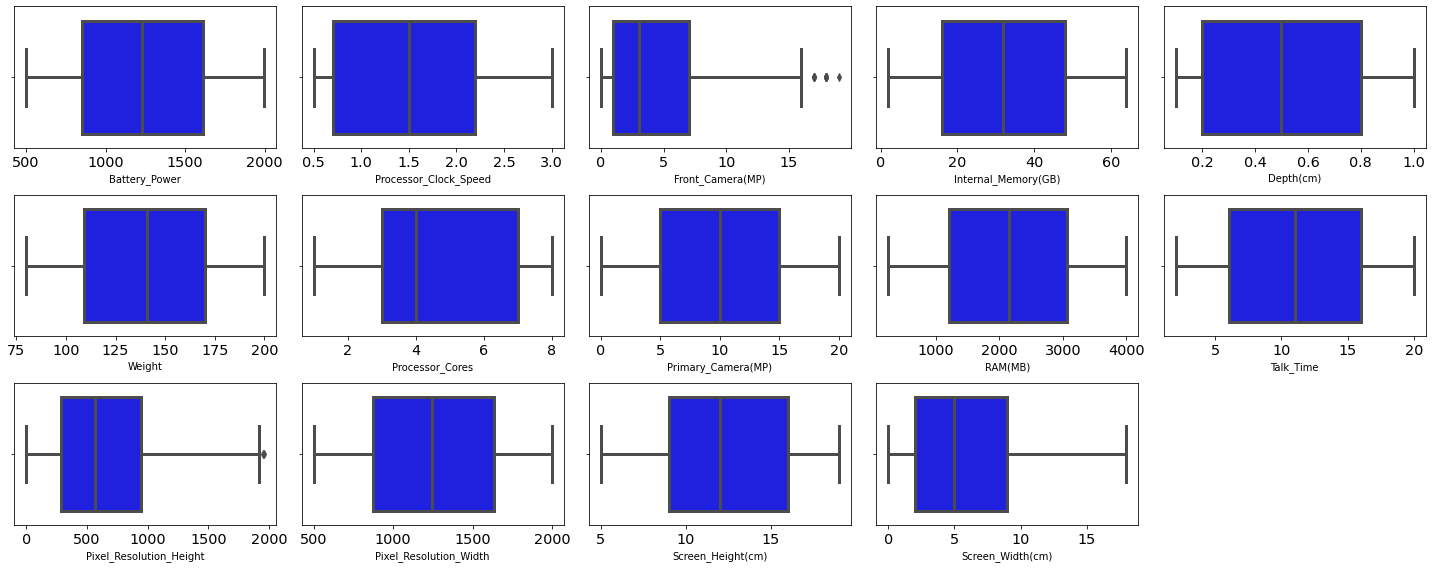

In [10]:
#box plot untuk check outlier

for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(dftrain[nums[i]], color='blue', orient='v')
    plt.tight_layout()

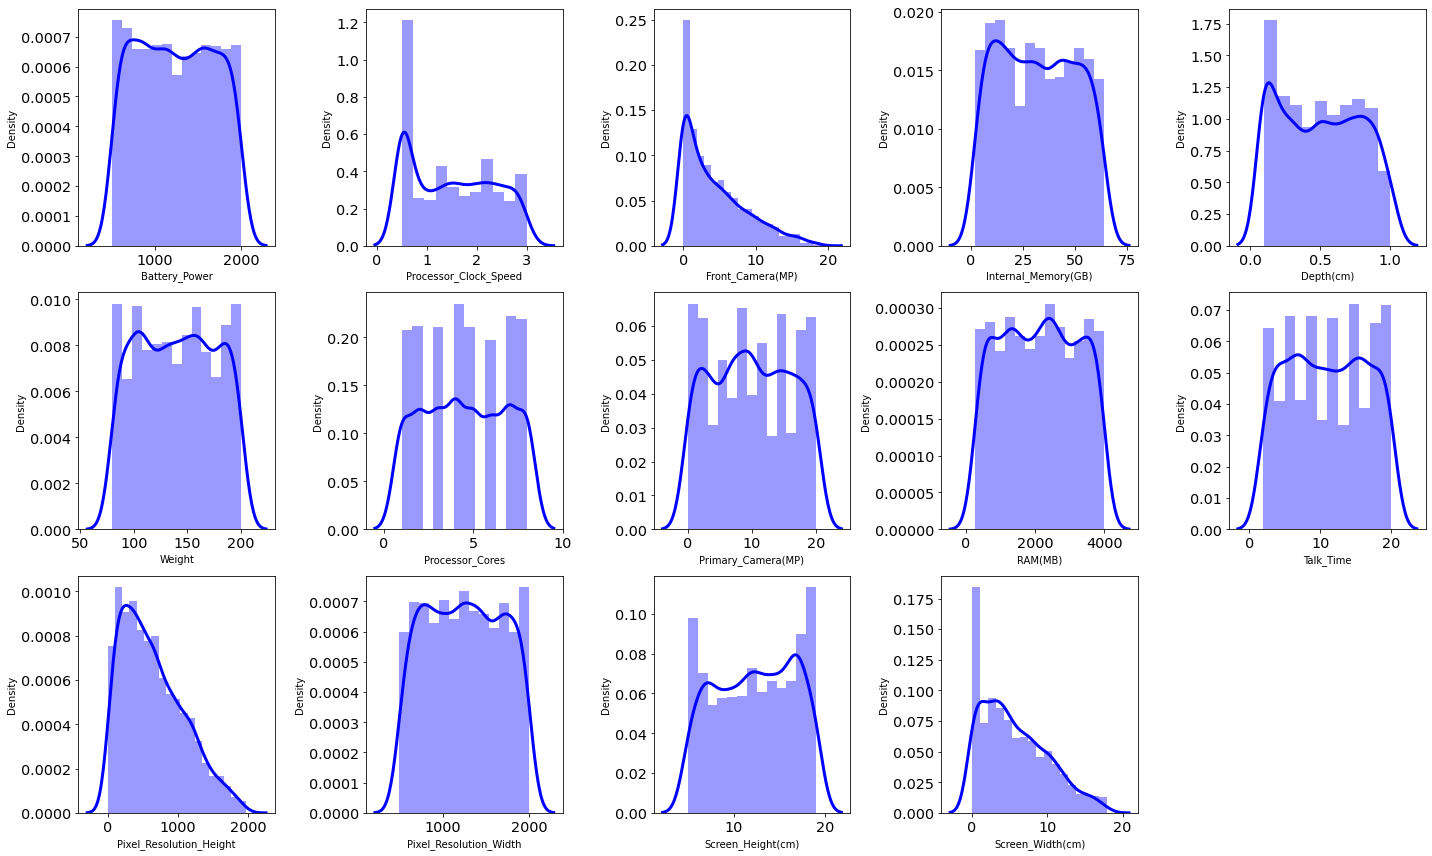

In [11]:
#displot untuk memperhatikan bentuk distribusi

plt.figure(figsize = (20,12))
for i in range(0,len(nums)):
    plt.subplot(3,5,i+1)
    sns.distplot(dftrain[nums[i]],color='blue')
    plt.tight_layout()

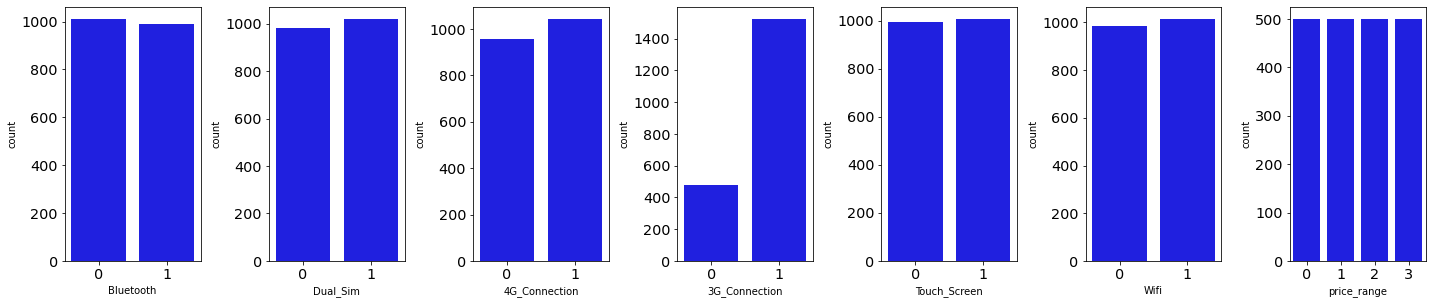

In [12]:
#count plot memeriksa distribusi data kategori
for i in range(0, len(cats)):
    plt.subplot(2, len(cats), i+1)
    sns.countplot(dftrain[cats[i]], color='blue', orient='v')
    plt.tight_layout()

## Multivariate Analysis


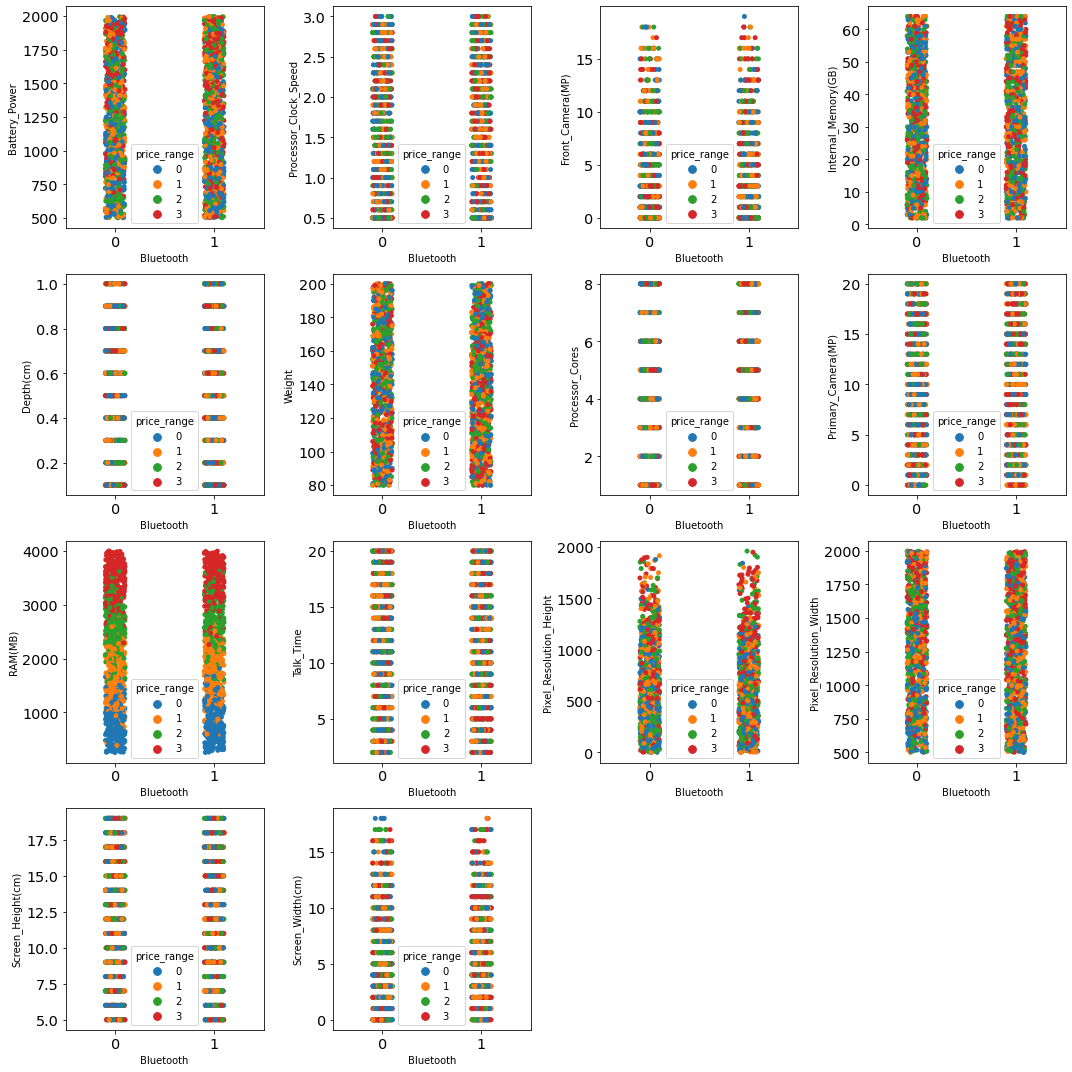

In [13]:
#Catplot untuk melihat korelasi masing2 feature numerik untuk masing2 categorical

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=dftrain, x='Bluetooth', y=nums[i],hue='price_range')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Terlihat bahwa Bluetooth tidak memiliki korelasi apapun dengan kolom numerik.

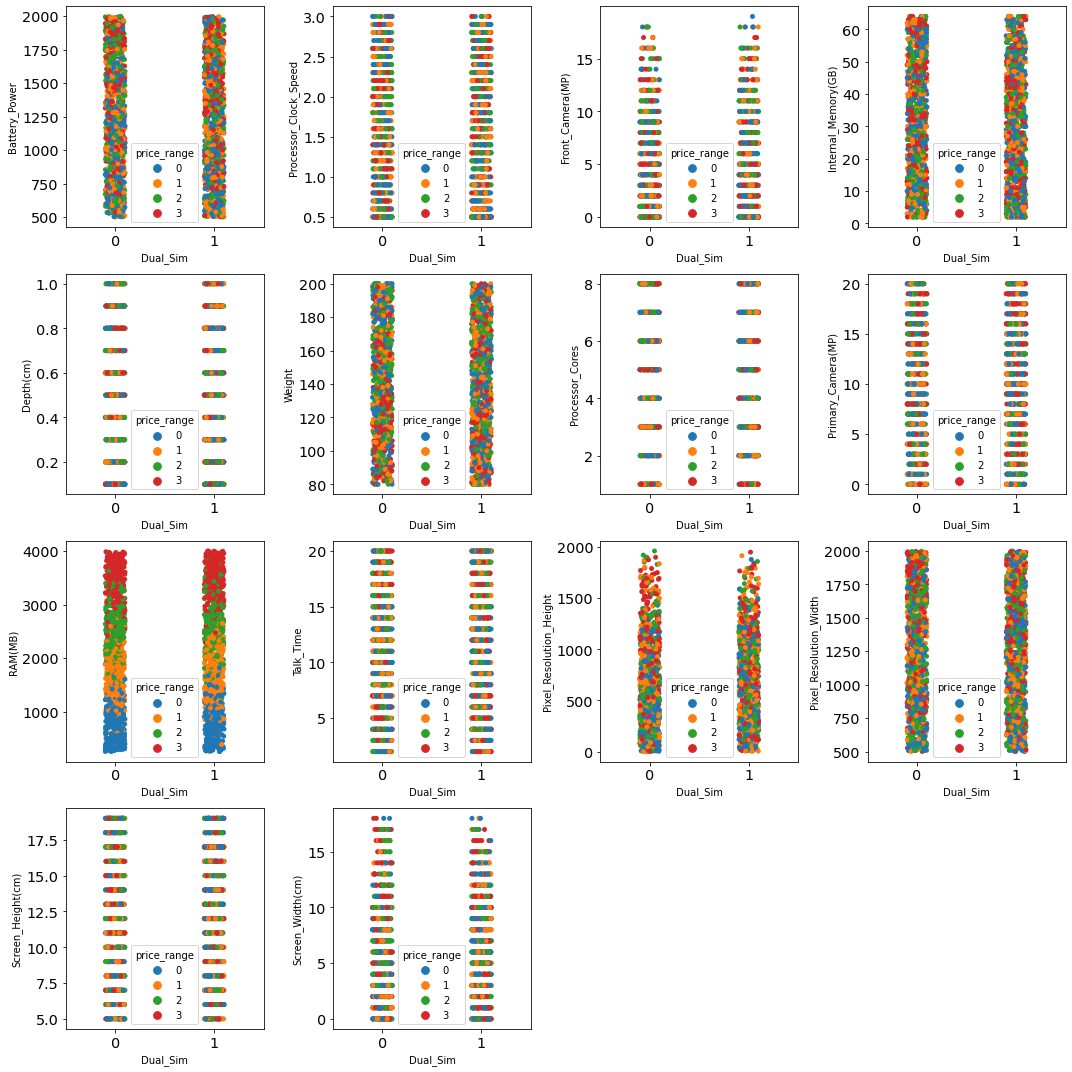

In [14]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=dftrain, x='Dual_Sim', y=nums[i],hue='price_range')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

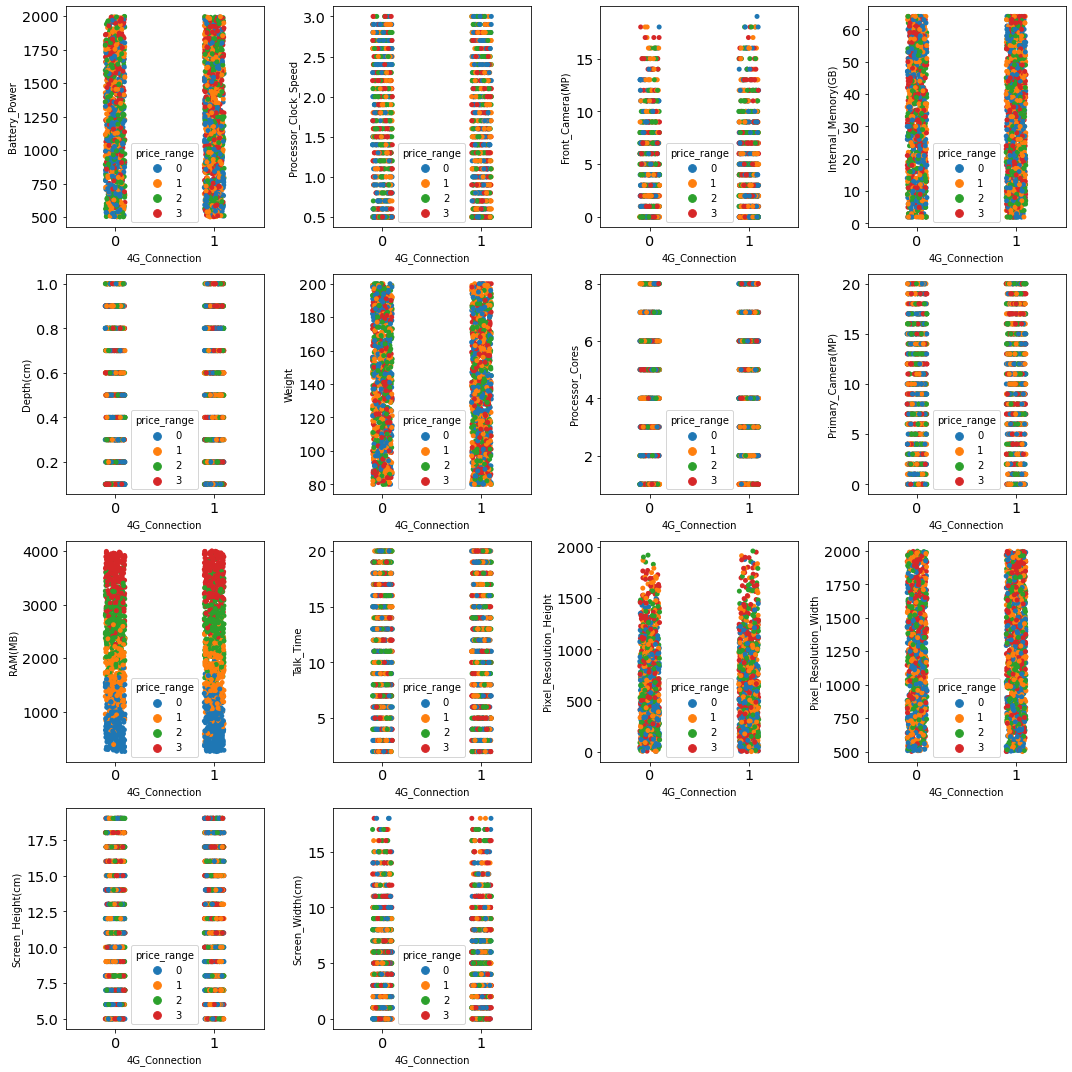

In [15]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=dftrain, x='4G_Connection', y=nums[i],hue='price_range')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Terlihat bahwa 4G_Connection tidak memiliki korelasi apapun dengan kolom numerik.

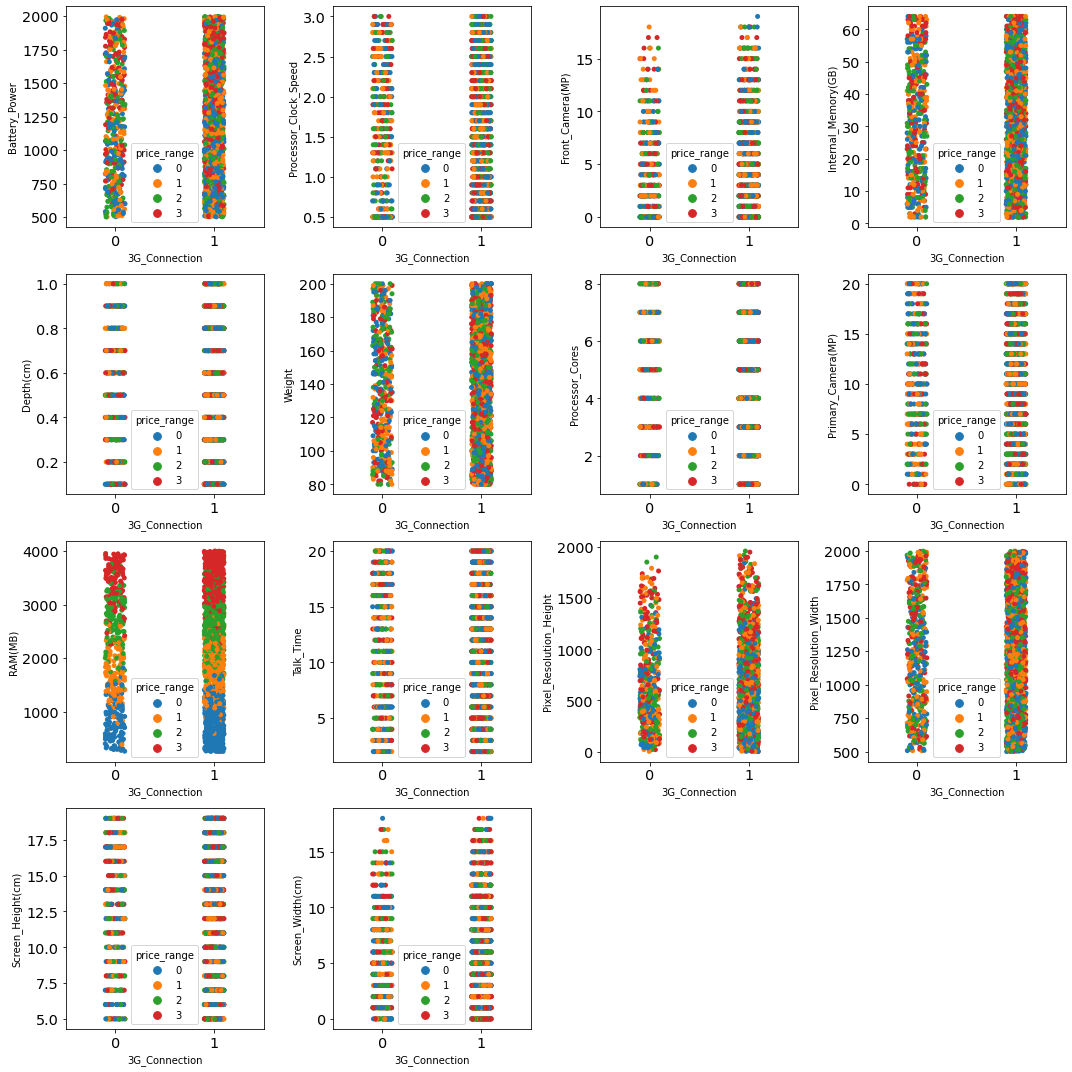

In [16]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=dftrain, x='3G_Connection', y=nums[i],hue='price_range')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Terlihat bahwa 3G_Connection tidak memiliki korelasi apapun dengan kolom numerik.

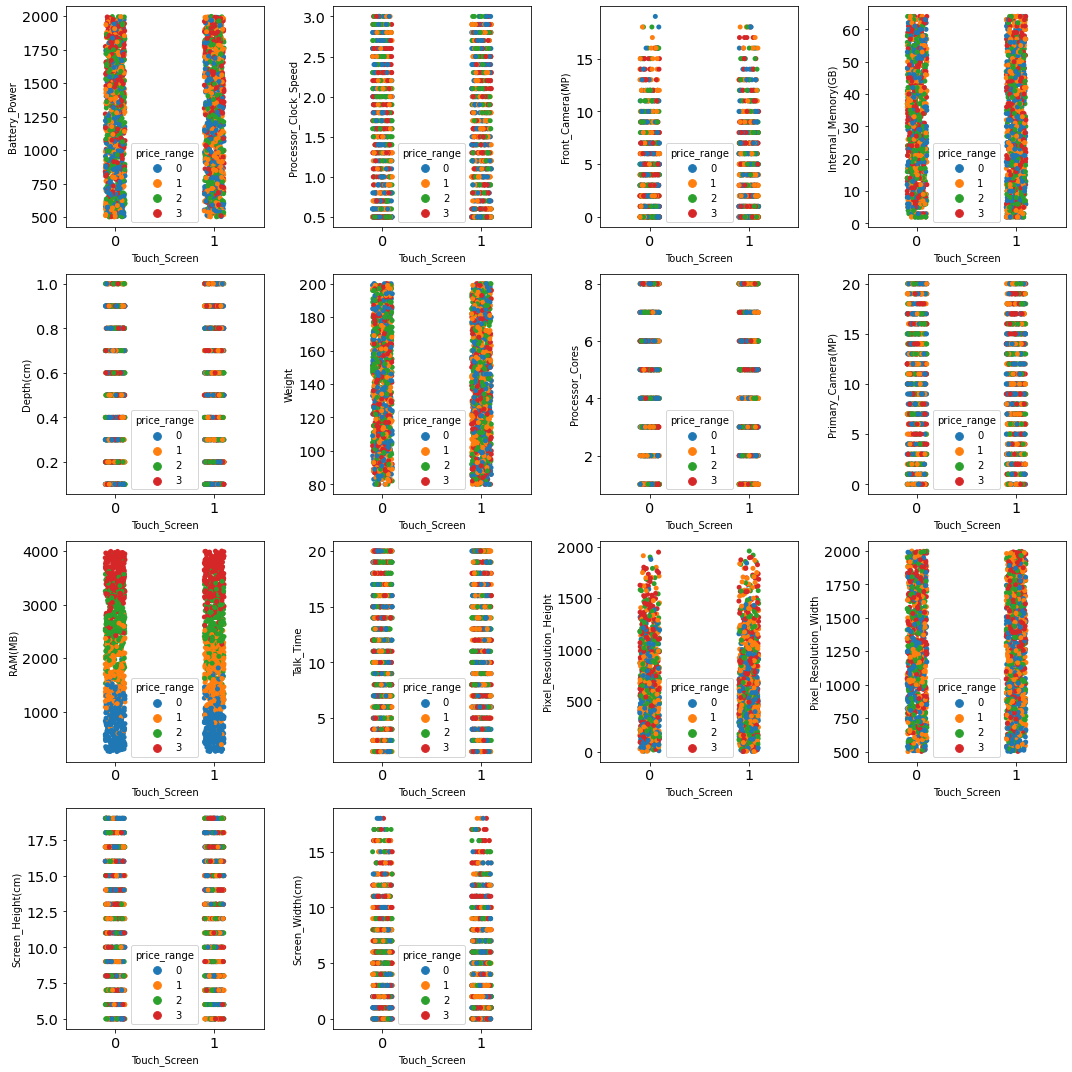

In [17]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=dftrain, x='Touch_Screen', y=nums[i],hue='price_range')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Terlihat bahwa Touch_Screen tidak memiliki korelasi apapun dengan kolom numerik.

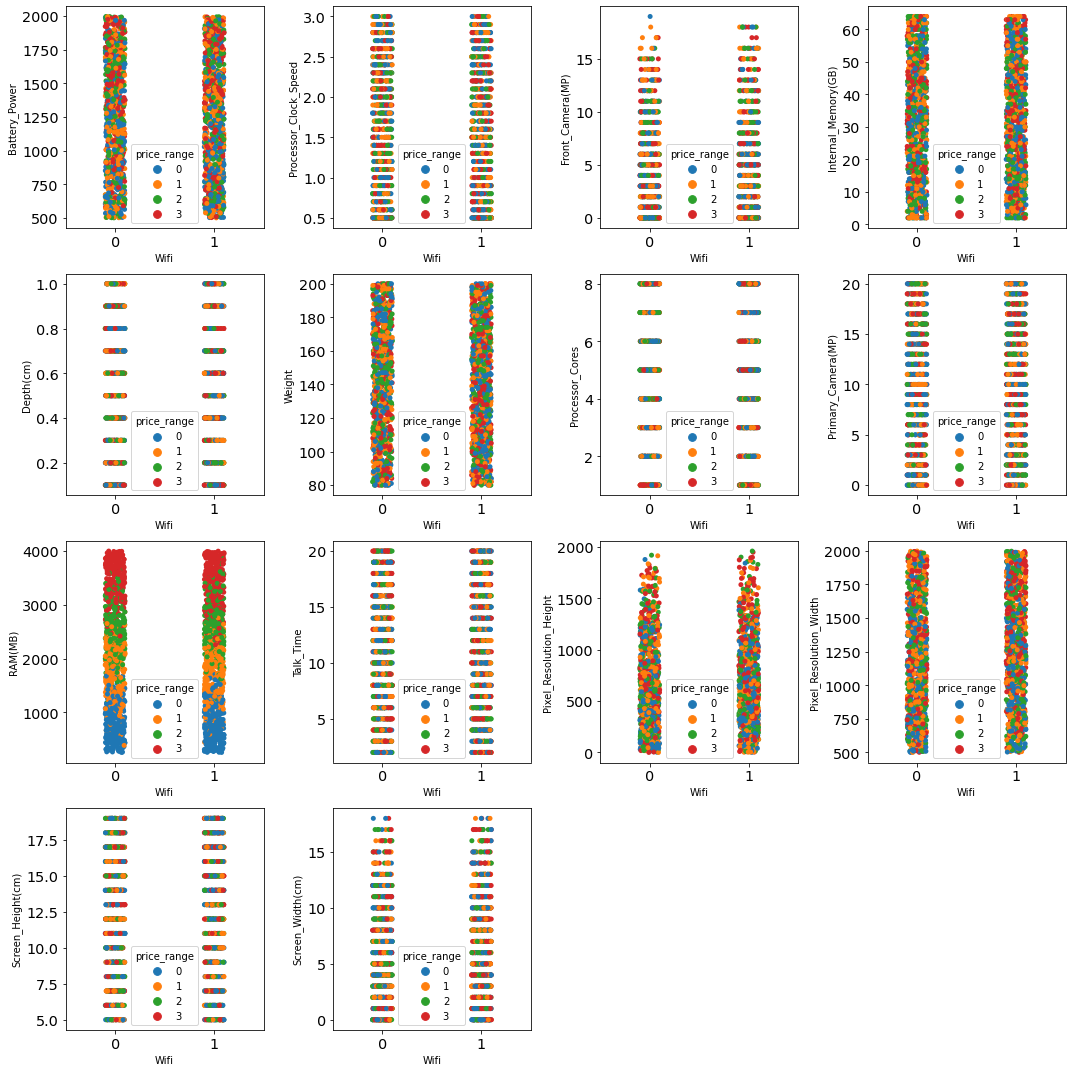

In [18]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=dftrain, x='Wifi', y=nums[i],hue='price_range')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Terlihat bahwa Wifi tidak memiliki korelasi apapun dengan kolom numerik.

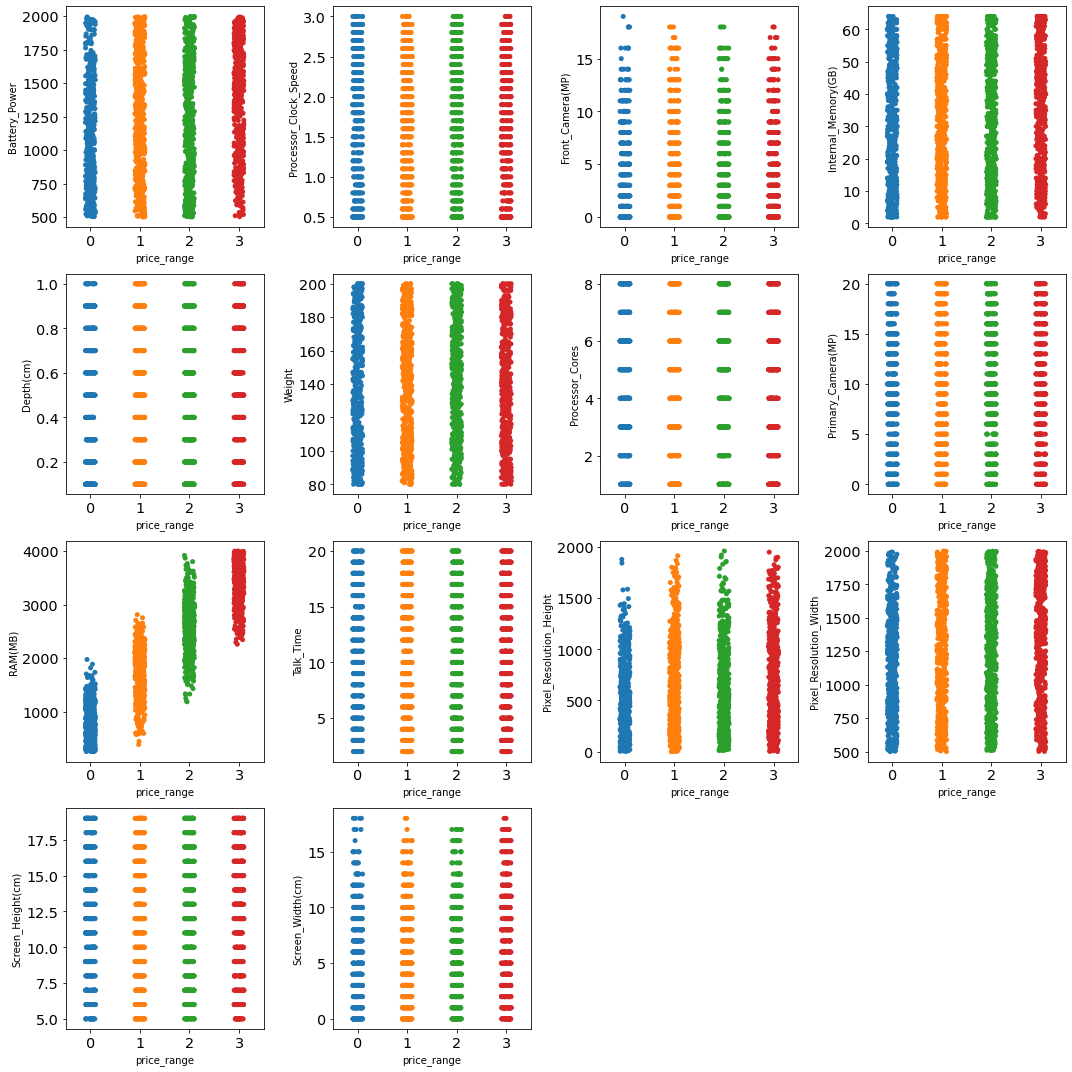

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=dftrain, x='price_range', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

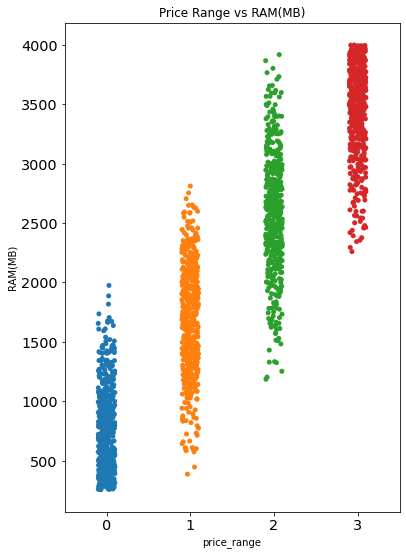

In [20]:
plt.figure(figsize=(6,9))
a = sns.stripplot( data=dftrain, x='price_range', y='RAM(MB)')
a.set_title('Price Range vs RAM(MB)')
plt.savefig('Price Range vs RAM(MB)')

Pada plot diatas terlihat :
* hubungan linear antara feature RAM dengan target
* untuk low price range hanya sedikit yang memiliki total pixel resolution yang tinggi

Dari Catplot numeric diatas dapat dilihat bahwa :
* Persebaran data pada setiap feature numeric terhadap target adalah merata, kecuali pada feature RAM, terlihat hubungan yang linear dimana semakin tinggi nilai RAM sebakin tinggi price range.

<AxesSubplot:>

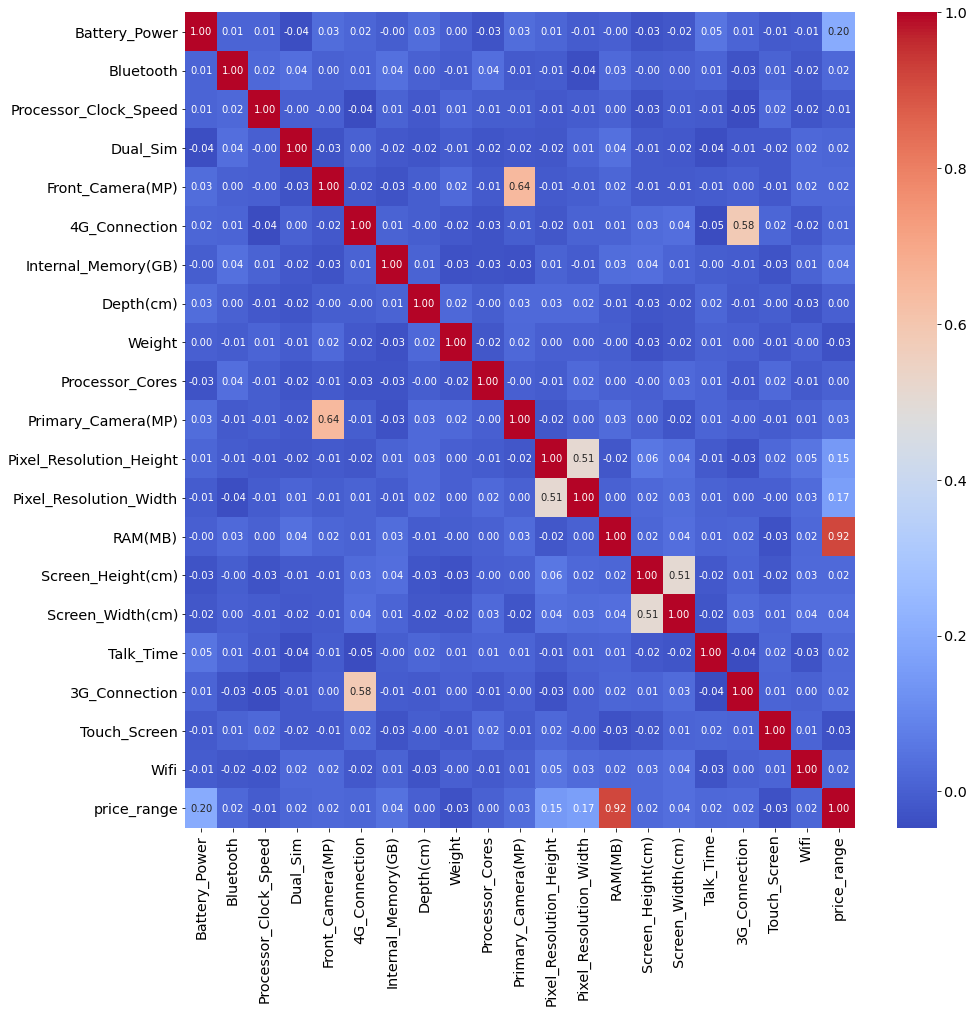

In [21]:
#Heatmap untuk mengetahui korelasi feature dengan target dan korelasi antara feature

plt.figure(figsize=(15, 15))
sns.heatmap(dftrain.corr(), cmap='coolwarm', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:

* Target kita `price_range` memiliki korelasi positif lemah dengan `Battery_power` ,`Pixel_Resolution_Height` ,`Pixel_Resolution_Width`
* Target juga memiliki korelasi positif kuat dengan `RAM`
* Feature `3G_Connection` memiliki korelasi positif kuat dengan `4G_Connection`. Ada kemungkinan kedua feature ini redundan atau bsa di extraction feature
* Feature `Front_Camera(MP)` memiliki kolerasi positif kuat dengan `Primary_Camera(MP)` ada kemungkinan feature redundan atau bsa di extraction feature
* Feature `Pixel_Resoulion_Height` memiliki korelasi positif kuat dengan `Pixel_Resolution_Width`. Ada kemungkinan feature ini redundan atau bisa di extraction feature

## Feature Engineering

untuk feature engineering akan dibuat 3 dataset yang berbeda:
1. Dataset Original
2. Dataset dengan menambahkan Screen Area(cm2) dan Total Pixel
3. Dataset dengan menambahkan Mobile Size(inch) dan PPI

In [22]:
#membuat tiga dataset tersebut

df_ori = dftrain.copy() #copying original data

df_st = dftrain.copy() #copying the original data into new dataset to be engineered
df_st['Screen_Area(cm2)'] = df_st['Screen_Height(cm)']*df_st['Screen_Height(cm)']
df_st['Total_Pixel'] = df_st['Pixel_Resolution_Height']*df_st['Pixel_Resolution_Width']
df_st = df_st.drop(['Screen_Height(cm)','Screen_Width(cm)','Pixel_Resolution_Height'],axis=1)

df_mp = dftrain.copy() #copyign the original data into new dataset to be engineered
df_mp['mobile_size(inch)']=((df_mp['Screen_Height(cm)']**2)+(df_mp['Screen_Width(cm)']**2)).apply(np.sqrt)
df_mp['mobile_size(inch)']=df_mp['mobile_size(inch)']/2.54 # konversi cm ke inch
df_mp['mobile_size(inch)']=df_mp['mobile_size(inch)'].apply(np.around,decimals=1)
df_mp['PPI'] = (np.sqrt((df_mp['Pixel_Resolution_Height']**2) + (df_mp['Pixel_Resolution_Width']**2))).apply(np.sqrt)
df_mp['PPI'] = df_mp['PPI']/df_mp['mobile_size(inch)'].apply(np.around,decimals=1)
df_mp = df_mp.drop(columns="Pixel_Resolution_Height")
df_mp = df_mp.drop(columns="Pixel_Resolution_Width")
df_mp = df_mp.drop(columns="Screen_Height(cm)")
df_mp = df_mp.drop(columns="Screen_Width(cm)")

In [23]:
#check the sample of each dataset
display(df_ori.sample(3))
display(df_st.sample(3))
display(df_mp.sample(3))

Battery_Power  Bluetooth  Processor_Clock_Speed  Dual_Sim  \
1130           1975          1                    1.9         1   
789            1614          0                    1.9         0   
1976           1201          1                    0.5         0   

      Front_Camera(MP)  4G_Connection  Internal_Memory(GB)  Depth(cm)  Weight  \
1130                 2              0                   31        0.9     151   
789                  8              1                   55        0.3     188   
1976                 2              0                   10        1.0      99   

      Processor_Cores  Primary_Camera(MP)  Pixel_Resolution_Height  \
1130                1                  17                      775   
789                 3                  17                      860   
1976                7                   7                      306   

      Pixel_Resolution_Width  RAM(MB)  Screen_Height(cm)  Screen_Width(cm)  \
1130                    1607     3022                 13                 5   
789                     1330     3914                 17                13   
1976                     558      495                 15                 6   

      Talk_Time  3G_Connection  Touch_Screen  Wifi  price_range  
1130         19              0             0     1            3  
789          13              1             0     0            3  
1976         14              1             1     1            0

Battery_Power  Bluetooth  Processor_Clock_Speed  Dual_Sim  \
1238           1597          1                    0.9         0   
1902            730          0                    1.5         0   
90             1724          0                    2.0         1   

      Front_Camera(MP)  4G_Connection  Internal_Memory(GB)  Depth(cm)  Weight  \
1238                 4              1                    4        0.5      85   
1902                 9              0                    9        0.7     122   
90                   2              1                   57        0.5     177   

      Processor_Cores  Primary_Camera(MP)  Pixel_Resolution_Width  RAM(MB)  \
1238                1                  19                    1145     2130   
1902                4                  15                    1677     2787   
90                  3                   5                    1924     2822   

      Talk_Time  3G_Connection  Touch_Screen  Wifi  price_range  \
1238         15              1             1     0            2   
1902          7              1             0     1            2   
90           16              1             1     0            3   

      Screen_Area(cm2)  Total_Pixel  
1238                64      1007600  
1902               100      2299167  
90                 361      3088020

Battery_Power  Bluetooth  Processor_Clock_Speed  Dual_Sim  \
884             841          1                    0.5         1   
1390           1726          1                    1.9         0   
1979           1614          0                    1.2         0   

      Front_Camera(MP)  4G_Connection  Internal_Memory(GB)  Depth(cm)  Weight  \
884                  8              0                   39        0.1     199   
1390                 1              1                   42        0.6     106   
1979                 1              1                    9        0.1     161   

      Processor_Cores  Primary_Camera(MP)  RAM(MB)  Talk_Time  3G_Connection  \
884                 6                  13     2942         16              0   
1390                5                   3     1868          6              1   
1979                3                   2     1832         11              1   

      Touch_Screen  Wifi  price_range  mobile_size(inch)       PPI  
884              1     1            2                4.8  6.561066  
1390             0     0            2                6.9  6.764191  
1979             0     0            1                6.7  5.237115

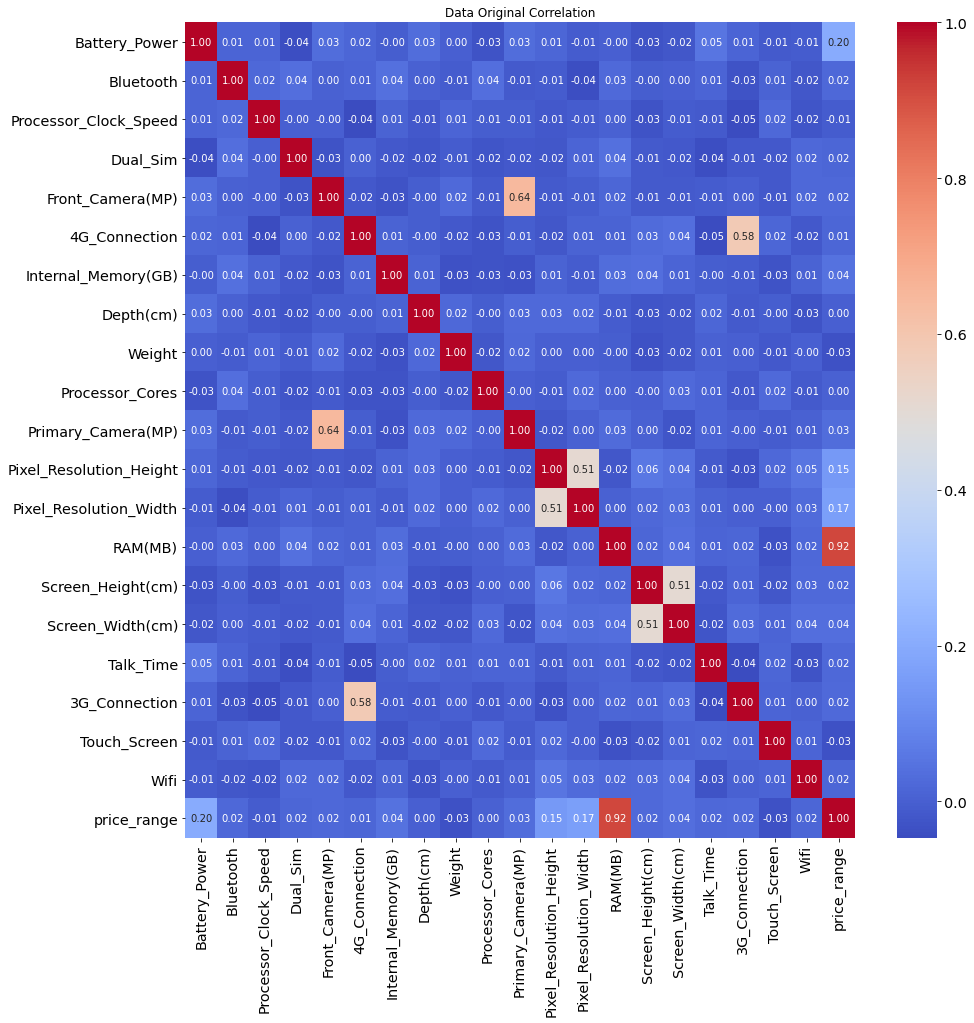

In [24]:
# melihat correlation dari dataset yang original

plt.figure(figsize=(15, 15))
figure_1 = sns.heatmap(df_ori.corr(), cmap='coolwarm', annot=True, fmt='.2f')
figure_1.set_title('Data Original Correlation')
plt.savefig('Data Original Correlation')

Text(0.5, 1.0, 'Data ST Correlation')

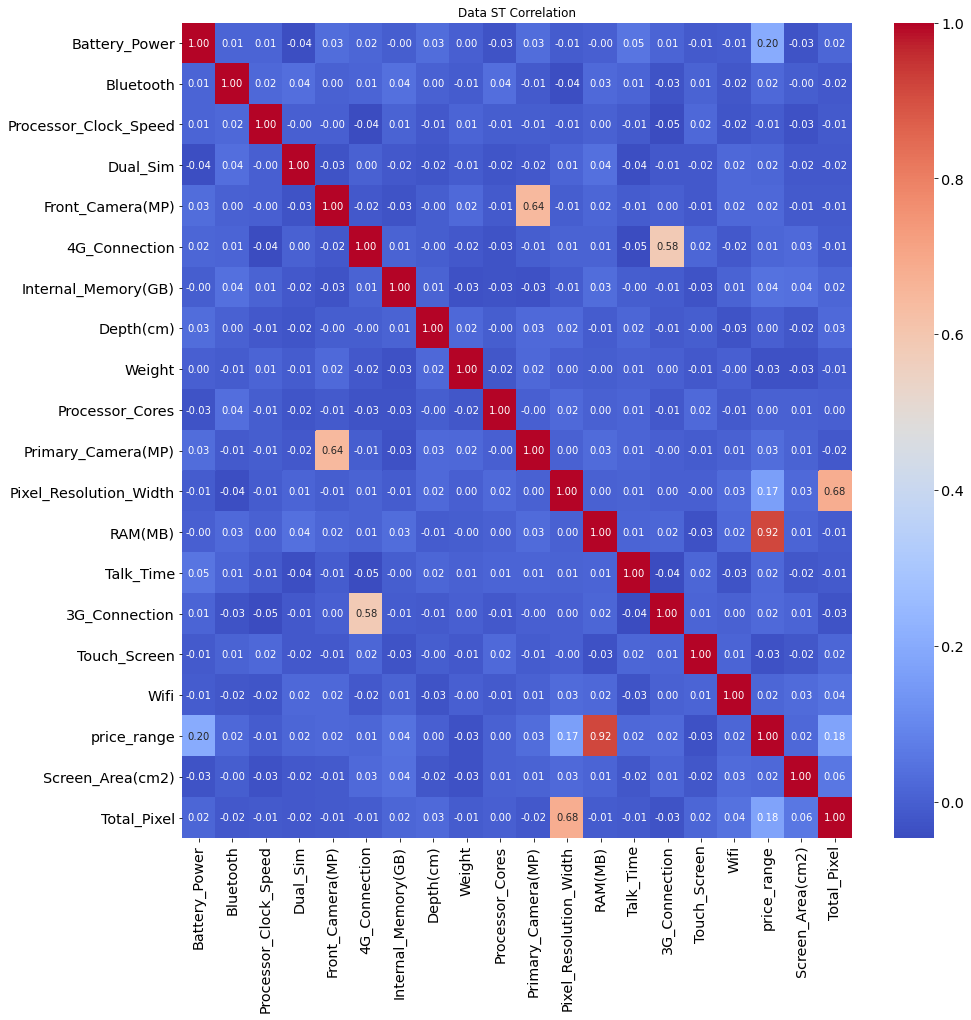

In [25]:
# melihat correlation dari dataset yang st

plt.figure(figsize=(15, 15))
figure_2 = sns.heatmap(df_st.corr(), cmap='coolwarm', annot=True, fmt='.2f')
figure_2.set_title('Data ST Correlation')

Text(0.5, 1.0, 'Data MP Correlation')

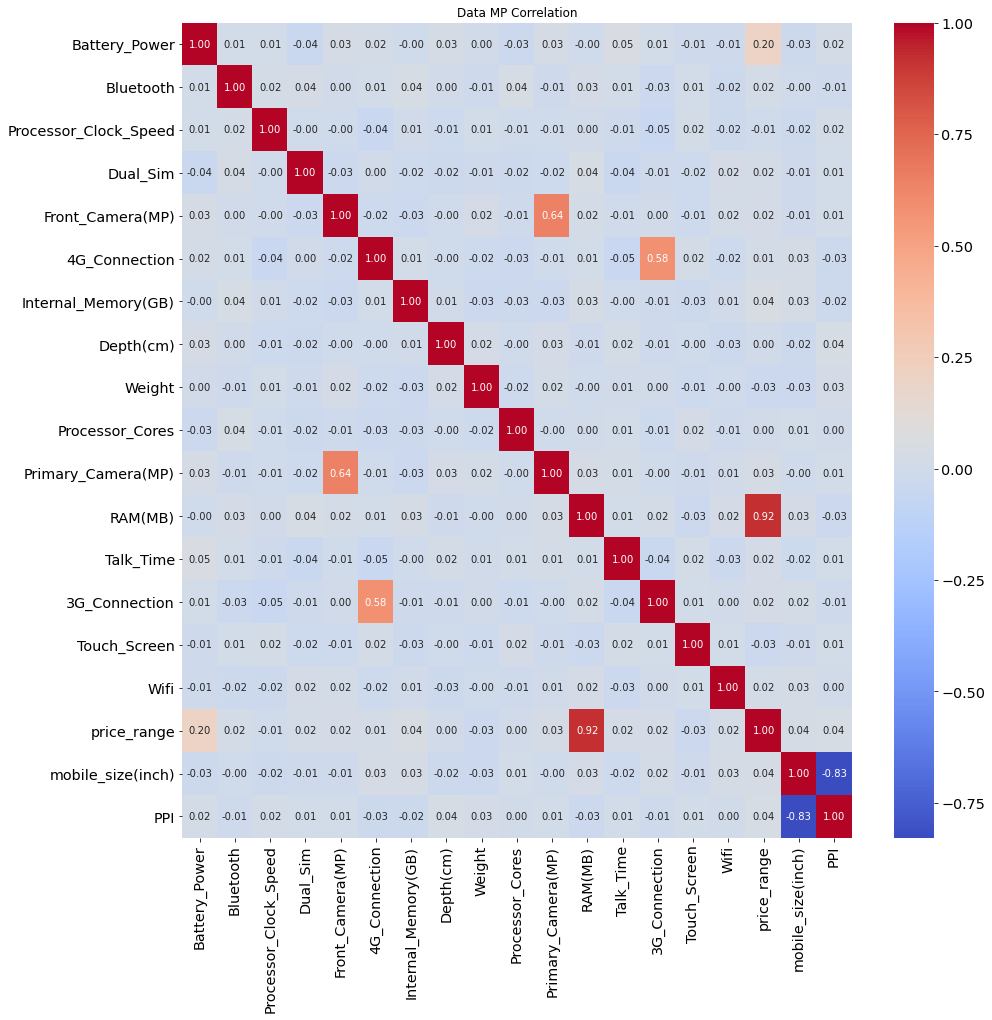

In [26]:
# melihat correlation dari dataset yang st

plt.figure(figsize=(15, 15))
figure_3 = sns.heatmap(df_mp.corr(), cmap='coolwarm', annot=True, fmt='.2f')
figure_3.set_title('Data MP Correlation')

Terlihat bahwa:
* Pada data original, banyak feature yang memiliki fitur yang kemungkinan redundan
* Pada data st, terdapat redundasi feature dihilangkan dan digantikan dengan oleh 3 fitur rekayasa dari fiture2 yang redundan
* Pada data st, terdapat feature yang direkayasa dengen mempertimbangkan kasus di real life

# Data Preprocessing and Machine Learning Modelling

## Data Preprocessing

### Data Defining and Splitting

In [27]:
#define x and y and split into train set and test set using the modified dataset
#df_ori
x_ori = df_ori.drop(['price_range'],axis=1).values.astype(float)
y_ori = df_ori['price_range'].values.astype(float)
xtrain_ori,xtest_ori,ytrain_ori,ytest_ori = train_test_split(x_ori,y_ori,test_size=1/3,random_state=123)
print(xtrain_ori.shape,ytrain_ori.shape)
print(xtest_ori.shape,ytrain_ori.shape)
print('-----')

#df_st
x_st = df_st.drop(['price_range'],axis=1).values.astype(float)
y_st = df_st['price_range'].values.astype(float)
xtrain_st,xtest_st,ytrain_st,ytest_st = train_test_split(x_st,y_st,test_size=1/3,random_state=123)
print(xtrain_st.shape,ytrain_st.shape)
print(xtest_st.shape,ytest_st.shape)
print('-----')

#df_mp
x_mp = df_mp.drop(['price_range'],axis=1).values.astype(float)
y_mp = df_mp['price_range'].values.astype(float)
xtrain_mp,xtest_mp,ytrain_mp,ytest_mp = train_test_split(x_mp,y_mp,test_size=1/3,random_state=123)
print(xtrain_mp.shape,ytrain_mp.shape)
print(xtest_mp.shape,ytest_mp.shape)
print('-----')

(1333, 20) (1333,)
(667, 20) (1333,)
-----
(1333, 19) (1333,)
(667, 19) (667,)
-----
(1333, 18) (1333,)
(667, 18) (667,)
-----


### Data Scaling

Karena data yang akan digunakan kebanyakan adalah uniform dan skewed, penormalan data akan dilakukan dengan standard scaler dan kita akan melihat juga data yang tidak di skala kan

In [28]:
#scaling data from all dataset

#df_ori
xtrain_oris = preprocessing.StandardScaler().fit(xtrain_ori).transform(xtrain_ori.astype(float))
xtest_oris = preprocessing.StandardScaler().fit(xtest_ori).transform(xtest_ori.astype(float))

#df_st
xtrain_sts = preprocessing.StandardScaler().fit(xtrain_st).transform(xtrain_st.astype(float))
xtest_sts = preprocessing.StandardScaler().fit(xtest_st).transform(xtest_st.astype(float))

#df_mp
xtrain_mps = preprocessing.StandardScaler().fit(xtrain_mp).transform(xtrain_mp.astype(float))
xtest_mps = preprocessing.StandardScaler().fit(xtest_mp).transform(xtest_mp.astype(float))

In [29]:
#modelling data using standard scaler
classification = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(), AdaBoostClassifier(),XGBClassifier()]

#df_ori
print('Dataset Original')
for x in classification:
    x.fit(xtrain_oris,ytrain_ori)
    classify= x.predict(xtest_oris)
    print('Default {0} Classification Report:'.format(x))
    print(classification_report(ytest_ori,classify))
print('------------------')
    

#df_ori
print('Dataset ST')
for x in classification:
    x.fit(xtrain_sts,ytrain_st)
    classify= x.predict(xtest_sts)
    print('Default {0} Classification Report:'.format(x))
    print(classification_report(ytest_st,classify))
print('------------------')
    

#df_ori
print('Dataset MP')
for x in classification:
    x.fit(xtrain_mps,ytrain_mp)
    classify= x.predict(xtest_mps)
    print('Default {0} Classification Report:'.format(x))
    print(classification_report(ytest_mp,classify))
print('------------------')
    

Dataset Original
Default LogisticRegression() Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       163
         1.0       0.95      0.91      0.93       172
         2.0       0.94      0.90      0.92       182
         3.0       0.91      0.99      0.95       150

    accuracy                           0.94       667
   macro avg       0.94      0.94      0.94       667
weighted avg       0.94      0.94      0.94       667

Default KNeighborsClassifier() Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.70      0.65       163
         1.0       0.37      0.37      0.37       172
         2.0       0.48      0.45      0.46       182
         3.0       0.62      0.55      0.58       150

    accuracy                           0.51       667
   macro avg       0.52      0.52      0.52       667
weighted avg       0.51      0.51      0.51       667

Default

In [30]:
#modelling data without standardscaler
#df_ori
print('Dataset Original')
for x in classification:
    x.fit(xtrain_ori,ytrain_ori)
    classify= x.predict(xtest_ori)
    print('Default {0} Classification Report:'.format(x))
    print(classification_report(ytest_ori,classify))
print('------------------')
    

#df_ori
print('Dataset ST')
for x in classification:
    x.fit(xtrain_st,ytrain_st)
    classify= x.predict(xtest_st)
    print('Default {0} Classification Report:'.format(x))
    print(classification_report(ytest_st,classify))
print('------------------')
    

#df_ori
print('Dataset MP')
for x in classification:
    x.fit(xtrain_mp,ytrain_mp)
    classify= x.predict(xtest_mp)
    print('Default {0} Classification Report:'.format(x))
    print(classification_report(ytest_mp,classify))
print('------------------')
    

Dataset Original
Default LogisticRegression() Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       163
         1.0       0.54      0.54      0.54       172
         2.0       0.54      0.39      0.45       182
         3.0       0.62      0.82      0.70       150

    accuracy                           0.63       667
   macro avg       0.62      0.64      0.62       667
weighted avg       0.62      0.63      0.62       667

Default KNeighborsClassifier() Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       163
         1.0       0.93      0.94      0.94       172
         2.0       0.93      0.87      0.90       182
         3.0       0.91      0.94      0.92       150

    accuracy                           0.93       667
   macro avg       0.93      0.93      0.93       667
weighted avg       0.93      0.93      0.93       667

Default

Dari data diatas dapat disimpulkan bahwa:
* Dengan menggunakan data yang diskalakan, model terbaik diantara semua model default adalah `LogisticRegression`. Data yang terbaik dengan kondisi modelling default adalah `Dataset Original` dan `Dataset ST`
* Dengan menggunakan data yang diskalakan, model kedua terbaik diantara semua model default adalah `XGBoostClassifier`. Data yang terbaik dengan kondisi modelling default adalah `Dataset Original` dan `Dataset ST`
* Dengan menggunakan data yang diskalakan, model ketiga terbaik diantara semua model default adalah `DecisionTreeClassifier`. Data yang terbaik dengan kondisi modelling default adalah `Dataset Original` dan `Dataset ST`
* Dengan menggunakan data yang tidak diskalakan, model terbaik diantara semua model default adalah `KNeighborClassifier`. Data yang terbaik menggunakan kondisi modelling default adalah `Dataset Original`
* Dengan menggunakan data yang tidak diskalakan, model kedua terbaik diantara semua model default adalah `XGBoostClassifier`. Data yang terbaik menggunakan kondisi modelling default adalah `Dataset Original` dan `Dataset ST`
* Dengan menggunakan data yang tidak diskalakan, model ketiga terbaik diantara semua model default adalah `RandomForestClassifier`. Data yang terbaik menggunakan kondisi modelling default adalah `Dataset Original` dan `Dataset ST`

Dari kesimpulan diatas, akan dilakukan optimisasi parameter hanya dari 2 dataset yang paling potensial menghasilkan akurasi model yang besar:
1. Dataset Original 
2. Dataset ST

Kedua dataset tersebut akan menggunakan ML model (yang akan dioptimisasi parameternya) dan dengan data yang diskalakan maupun yang belum diskalakan:
1. LogisticRegression()
2. XGBoostClassifier()
3. KNeighborClassifier()
4. DecisionTreeClassifier()
5. RandomForestClassifier()
6. AdaBoostClassifier()



### ML Model Pipeline

Karena akan banyak pemrosesan, perlu dilakukan Pipeline Modelling untuk mempersingkat code dan waktu, akan diambil akurasi yang terbesar

In [31]:
#defining pipeline function

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, params, cv=10, scoring_fit='accuracy',
                       scoring_test=accuracy_score, do_probabilities = False):
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=params, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = rs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    score = scoring_test(y_test_data, pred)
    
    return [best_model, pred, score]

In [32]:
#defining model to be tested
models_to_train = [LogisticRegression(), XGBClassifier(), KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier()]

In [33]:
# Defining the hyperparameters to optimize
grid_parameters = [
    { # LogisticRegression
        'penalty': ['l2'],
        'C': [1,0.1,0.001,0.0001,2,0.2,0.002,0.0002,3,0.3,0.003,0.0003,4,0.4,0.004,0.0004,5,0.05,0.005,0.0005],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': np.arange(25,300,25),
        'multi_class': ['auto', 'ovr', 'multinomial']
    },
    { # XGBoostClassifier
        'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
        'gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth' : [1, 2, 3, 4, 5],
        'tree_method' : ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
    }, 
    { # KNeighborClassifier
        'n_neighbors': np.arange(1, 20, 1),
        'weights': ['uniform','distance'],
        'algorithm': ['auto','ball_tree','kd_tree','brute'],
        'leaf_size': [20,30,40,50],
        'p' : [1,2]
    }, 
    { # DecisionTreeClassifier
        'criterion': ['gini','entropy'],
        'splitter': ['best','random'],
        'min_samples_split': [1,2,3,4,5],
        'min_samples_leaf' : [1,2,3,4,5],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    { # RandomForestClassifier
       'n_estimators': np.arange(25,300,25),
        'criterion': ['gini','entropy'],
        'min_samples_split': [1,2,3,4,5],
        'min_samples_leaf' : [1,2,3,4,5],
        'max_features': ['auto', 'sqrt', 'log2'],
        'class_weight': ['balanced','balanced_subsample']
    },
    { # AdaBoostClassifier
        'n_estimators': np.arange(25,300,25),
        'learning_rate': [1,2,3,4,5,6,7,8,9,10],
        'algorithm': ['SAMME','SAMME.R']}
    
]

### Pipelining Original Dataset Without Scaling

In [34]:
#pipelining dataset original WITHOUT scaling
models_preds_scores_ori = []
for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(xtrain_ori, xtest_ori, ytrain_ori, ytest_ori, 
                                 model, params, cv=5)
    models_preds_scores_ori.append(result)
    
for result in models_preds_scores_ori:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.1s finished


[09:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model: LogisticRegression, Score: 0.9625187406296851
Model: XGBClassifier, Score: 0.9130434782608695
Model: KNeighborsClassifier, Score: 0.9250374812593704
Model: DecisionTreeClassifier, Score: 0.7031484257871065
Model: RandomForestClassifier, Score: 0.8695652173913043
Model: AdaBoostClassifier, Score: 0.7106446776611695


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


### Pipelining Original Dataset With StandardScaler

In [35]:
#pipelining dataset original WITH scaling
models_preds_scores_oris = []
for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(xtrain_oris, xtest_oris, ytrain_ori, ytest_ori, 
                                 model, params, cv=5)
    models_preds_scores_oris.append(result)
    
for result in models_preds_scores_oris:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.0s finished


[09:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model: LogisticRegression, Score: 0.9535232383808095
Model: XGBClassifier, Score: 0.9055472263868066
Model: KNeighborsClassifier, Score: 0.5817091454272864
Model: DecisionTreeClassifier, Score: 0.7421289355322339
Model: RandomForestClassifier, Score: 0.8755622188905547
Model: AdaBoostClassifier, Score: 0.5847076461769115


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


### Pipelining Dataset ST Without Scaling

In [36]:
#pipelining dataset st WITHOUT scaling
models_preds_scores_st = []
for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(xtrain_st, xtest_st, ytrain_st, ytest_st, 
                                 model, params, cv=5)
    models_preds_scores_st.append(result)

for result in models_preds_scores_st:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.1s finished


[09:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.5s finished


Model: LogisticRegression, Score: 0.8050974512743628
Model: XGBClassifier, Score: 0.9220389805097451
Model: KNeighborsClassifier, Score: 0.41379310344827586
Model: DecisionTreeClassifier, Score: 0.6266866566716641
Model: RandomForestClassifier, Score: 0.8860569715142429
Model: AdaBoostClassifier, Score: 0.7496251874062968


### Pipelining Dataset ST With Scaling

In [37]:
#pipelining dataset st WITH scaling
models_preds_scores_sts = []
for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(xtrain_sts, xtest_sts, ytrain_st, ytest_st, 
                                 model, params, cv=5)
    models_preds_scores_sts.append(result)

for result in models_preds_scores_sts:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.9s finished


[09:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Model: LogisticRegression, Score: 0.9415292353823088
Model: XGBClassifier, Score: 0.9160419790104948
Model: KNeighborsClassifier, Score: 0.6401799100449775
Model: DecisionTreeClassifier, Score: 0.5937031484257871
Model: RandomForestClassifier, Score: 0.8695652173913043
Model: AdaBoostClassifier, Score: 0.6986506746626686


Hal yang bisa diambil dari pengujian diatas adalah:
* `Dataset Original` lebih baik dibandingkan dengan dataset yang telah dimodifikasi
* Tidak menggunakan standardscaler menghasilkan model yang lebih baik akurasinya ketika mengoptimalkan hyperparameters

Berdasarkan hal tersebut, akan dilakukan hyperparameters breakdown untuk setiap modelnya untuk dataset original baik yang menggunakan standardscaler maupun yang tidak menggunakan

### Data Original Without StandardScaler ML Modelling Hyperparameters Breakdown

In [38]:
#logistic Regression
penalty = ['l2']
C = [1,0.1,0.001,0.0001,2,0.2,0.002,0.0002,3,0.3,0.003,0.0003,4,0.4,0.004,0.0004,5,0.05,0.005,0.0005]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = np.arange(25,300,25)
multi_class = ['auto', 'ovr', 'multinomial']
#combining parameters
hyperparameters_lr= dict(penalty=penalty, solver=solver, max_iter=max_iter, multi_class=multi_class)
#input parameters into the model
lr = LogisticRegression(n_jobs=-1)
best_lr_ori = GridSearchCV(lr,hyperparameters_lr, n_jobs=-1)
best_lr_s = GridSearchCV(lr,hyperparameters_lr, n_jobs=-1)
#fit both data (with and without standarscaler)
best_lr_ori.fit(xtrain_ori,ytrain_ori)
best_lr_s.fit(xtrain_oris,ytrain_ori)

#printing output
print('Without scaling')
print('Best C:',best_lr_ori.best_estimator_.get_params()['C'])
print('Best solver:',best_lr_ori.best_estimator_.get_params()['solver'])
print('Best max iter:',best_lr_ori.best_estimator_.get_params()['max_iter'])
print('Best multi class:',best_lr_ori.best_estimator_.get_params()['multi_class'])
print('---------------------------------------------')
print('With Scaling')
print('Best C:',best_lr_s.best_estimator_.get_params()['C'])
print('Best solver:',best_lr_s.best_estimator_.get_params()['solver'])
print('Best max iter:',best_lr_s.best_estimator_.get_params()['max_iter'])
print('Best multi class:',best_lr_s.best_estimator_.get_params()['multi_class'])
print('---------------------------------------------')
#predicting the model
best_lr_ori_predict = best_lr_ori.predict(xtest_ori)
best_lr_s_predict = best_lr_s.predict(xtest_oris)
#classification report
print('Classification Report LR w/o Scaler')
print(classification_report(ytest_ori,best_lr_ori_predict))
print('Classification Report LR w Scaler')
print(classification_report(ytest_ori,best_lr_s_predict))

Without scaling
Best C: 1.0
Best solver: newton-cg
Best max iter: 275
Best multi class: auto
---------------------------------------------
With Scaling
Best C: 1.0
Best solver: sag
Best max iter: 50
Best multi class: multinomial
---------------------------------------------
Classification Report LR w/o Scaler
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       163
         1.0       0.98      0.95      0.97       172
         2.0       0.95      0.95      0.95       182
         3.0       0.95      0.97      0.96       150

    accuracy                           0.97       667
   macro avg       0.97      0.97      0.97       667
weighted avg       0.97      0.97      0.97       667

Classification Report LR w Scaler
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       163
         1.0       0.95      0.91      0.93       172
         2.0       0.94      0.90      0.92       182
   

In [39]:
lr_best_o = LogisticRegression(C=1,solver='newton-cg',max_iter=275,multi_class='auto',n_jobs=-1)
lr_best_s = LogisticRegression(C=1,solver='sag',max_iter=100,multi_class='multinomial',n_jobs=-1)

In [40]:
#XGBoost Classifier
eta = [0.1, 0.2, 0.3, 0.4, 0.5]
gamma = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = [1, 2, 3, 4, 5, 6, 7]
tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
#combining parameters
hyperparameters_xg= dict(eta=eta,gamma=gamma,max_depth=max_depth,tree_method=tree_method)
#input parameters into the model
xg = XGBClassifier(n_jobs=-1)
best_xg_ori = GridSearchCV(xg,hyperparameters_xg, n_jobs=-1)
best_xg_s = GridSearchCV(xg,hyperparameters_xg, n_jobs=-1)
#fit both data (with and without standarscaler)
best_xg_ori.fit(xtrain_ori,ytrain_ori)
best_xg_s.fit(xtrain_oris,ytrain_ori)

#printing output
print('Without scaling')
print('Best eta:',best_xg_ori.best_estimator_.get_params()['eta'])
print('Best gamma:',best_xg_ori.best_estimator_.get_params()['gamma'])
print('Best max_depth:',best_xg_ori.best_estimator_.get_params()['max_depth'])
print('Best tree_method:',best_xg_ori.best_estimator_.get_params()['tree_method'])
print('---------------------------------------------')
print('With Scaling')
print('Best eta:',best_xg_s.best_estimator_.get_params()['eta'])
print('Best gamma:',best_xg_s.best_estimator_.get_params()['gamma'])
print('Best max_depth:',best_xg_s.best_estimator_.get_params()['max_depth'])
print('Best tree_method:',best_xg_s.best_estimator_.get_params()['tree_method'])
print('---------------------------------------------')

#predicting the model
best_xg_ori_predict = best_xg_ori.predict(xtest_ori)
best_xg_s_predict = best_xg_s.predict(xtest_oris)
#classification report
print('Classification Report LR w/o Scaler')
print(classification_report(ytest_ori,best_xg_ori_predict))
print('Classification Report LR w Scaler')
print(classification_report(ytest_ori,best_xg_s_predict))

[10:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Without scaling
Best eta: 0.4
Best gamma: 0
Best max_depth: 2
Best tree_method: approx
---------------------------------------------
With Scaling
Best eta: 0.4
Best gamma: 0
Best max_depth: 2
Best tree_method: approx
---------------------------------------------
Classification Report LR w/o Scaler
              precision    recall  f1-score   support

         0.0       0.94 

In [41]:
xg_best_o = XGBClassifier(eta=0.4,gamma=0,max_depth=2,tree_method='approx',n_jobs=-1)
xg_best_s = XGBClassifier(eta=0.4,gamma=0,max_depth=2,tree_method='approx',n_jobs=-1)

In [42]:
#KNeighborClassifier
n_neighbors = np.arange(1, 20, 1)
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
leaf_size = [20,30,40,50]
p = [1,2]
#combining parameters
hyperparameters_kn= dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size)
#input parameters into the model
kn = KNeighborsClassifier(n_jobs=-1)
best_kn_ori = GridSearchCV(kn,hyperparameters_kn, n_jobs=-1)
best_kn_s = GridSearchCV(kn,hyperparameters_kn, n_jobs=-1)
#fit both data (with and without standarscaler)
best_kn_ori.fit(xtrain_ori,ytrain_ori)
best_kn_s.fit(xtrain_oris,ytrain_ori)

#printing output
print('Without scaling')
print('Best n_neighbors:',best_kn_ori.best_estimator_.get_params()['n_neighbors'])
print('Best weights:',best_kn_ori.best_estimator_.get_params()['weights'])
print('Best algortihm:',best_kn_ori.best_estimator_.get_params()['algorithm'])
print('Best leaf_size:',best_kn_ori.best_estimator_.get_params()['leaf_size'])
print('---------------------------------------------')
print('With Scaling')
print('Best n_neighbors:',best_kn_s.best_estimator_.get_params()['n_neighbors'])
print('Best weights:',best_kn_s.best_estimator_.get_params()['weights'])
print('Best algortihm:',best_kn_s.best_estimator_.get_params()['algorithm'])
print('Best leaf_size:',best_kn_s.best_estimator_.get_params()['leaf_size'])
print('---------------------------------------------')

#predicting the model
best_kn_ori_predict = best_kn_ori.predict(xtest_ori)
best_kn_s_predict = best_kn_s.predict(xtest_oris)
#classification report
print('Classification Report KN w/o Scaler')
print(classification_report(ytest_ori,best_kn_ori_predict))
print('Classification Report KN w Scaler')
print(classification_report(ytest_ori,best_kn_s_predict))

Without scaling
Best n_neighbors: 13
Best weights: distance
Best algortihm: auto
Best leaf_size: 20
---------------------------------------------
With Scaling
Best n_neighbors: 19
Best weights: distance
Best algortihm: auto
Best leaf_size: 20
---------------------------------------------
Classification Report KN w/o Scaler
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       163
         1.0       0.92      0.93      0.93       172
         2.0       0.92      0.88      0.90       182
         3.0       0.93      0.93      0.93       150

    accuracy                           0.93       667
   macro avg       0.93      0.93      0.93       667
weighted avg       0.93      0.93      0.93       667

Classification Report KN w Scaler
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       163
         1.0       0.54      0.54      0.54       172
         2.0       0.50      0.46      0.48

In [43]:
kn_best_o = KNeighborsClassifier(n_neighbors=13,weights='distance',algorithm='auto',leaf_size=20,n_jobs=-1)
kn_best_s = KNeighborsClassifier(n_neighbors=19,weights='distance',algorithm='auto',leaf_size=20,n_jobs=-1)

In [44]:
#DecisionTreeClassifier
criterion = ['gini','entropy']
splitter = ['best','random']
min_samples_split = [1,2,3,4,5]
min_samples_leaf = [1,2,3,4,5]
max_features = ['auto', 'sqrt', 'log2']
#combining parameters
hyperparameters_dt= dict(criterion=criterion,splitter=splitter,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
#input parameters into the model
dt = DecisionTreeClassifier()
best_dt_ori = GridSearchCV(dt,hyperparameters_dt, n_jobs=-1)
best_dt_s = GridSearchCV(dt,hyperparameters_dt, n_jobs=-1)
#fit both data (with and without standarscaler)
best_dt_ori.fit(xtrain_ori,ytrain_ori)
best_dt_s.fit(xtrain_oris,ytrain_ori)

#printing output
print('Without scaling')
print('Best criterion:',best_dt_ori.best_estimator_.get_params()['criterion'])
print('Best splitter:',best_dt_ori.best_estimator_.get_params()['splitter'])
print('Best min_samples_split:',best_dt_ori.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:',best_dt_ori.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:',best_dt_ori.best_estimator_.get_params()['max_features'])
print('---------------------------------------------')
print('With Scaling')
print('Best criterion:',best_dt_s.best_estimator_.get_params()['criterion'])
print('Best splitter:',best_dt_s.best_estimator_.get_params()['splitter'])
print('Best min_samples_split:',best_dt_s.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:',best_dt_s.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:',best_dt_s.best_estimator_.get_params()['max_features'])
print('---------------------------------------------')

#predicting the model
best_dt_ori_predict = best_dt_ori.predict(xtest_ori)
best_dt_s_predict = best_dt_s.predict(xtest_oris)
#classification report
print('Classification Report DT w/o Scaler')
print(classification_report(ytest_ori,best_dt_ori_predict))
print('Classification Report DT w Scaler')
print(classification_report(ytest_ori,best_dt_s_predict))

Without scaling
Best criterion: entropy
Best splitter: best
Best min_samples_split: 4
Best min_samples_leaf: 5
Best max_features: None
---------------------------------------------
With Scaling
Best criterion: entropy
Best splitter: best
Best min_samples_split: 3
Best min_samples_leaf: 3
Best max_features: None
---------------------------------------------
Classification Report DT w/o Scaler
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       163
         1.0       0.85      0.81      0.83       172
         2.0       0.85      0.80      0.82       182
         3.0       0.85      0.91      0.88       150

    accuracy                           0.86       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.86      0.86      0.86       667

Classification Report DT w Scaler
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       163
         1.0       0.81    

In [45]:
dt_best_o = DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=3,min_samples_leaf=3,max_features=None)
dt_best_s = DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=4,min_samples_leaf=3,max_features=None)

In [46]:
#RandomForestClassifier
n_estimators = np.arange(25,300,25)
criterion = ['gini','entropy']
min_samples_split = [1,2,3,4,5]
min_samples_leaf = [1,2,3,4,5]
max_features =  ['auto', 'sqrt', 'log2']
class_weight = ['balanced','balanced_subsample']

#combining parameters
hyperparameters_rf= dict(n_estimators=n_estimators,criterion=criterion,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf, max_features=max_features,class_weight=class_weight)
#input parameters into the model
rf = RandomForestClassifier(n_jobs=-1)
best_rf_ori = GridSearchCV(rf,hyperparameters_rf, n_jobs=-1)
best_rf_s = GridSearchCV(rf,hyperparameters_rf, n_jobs=-1)
#fit both data (with and without standarscaler)
best_rf_ori.fit(xtrain_ori,ytrain_ori)
best_rf_s.fit(xtrain_oris,ytrain_ori)

#printing output
print('Without scaling')
print('Best n_estimators:',best_rf_ori.best_estimator_.get_params()['n_estimators'])
print('Best criterion:',best_rf_ori.best_estimator_.get_params()['criterion'])
print('Best min_samples_split:',best_rf_ori.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:',best_rf_ori.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:',best_rf_ori.best_estimator_.get_params()['max_features'])
print('Best class_weight:',best_rf_ori.best_estimator_.get_params()['class_weight'])
print('---------------------------------------------')
print('With Scaling')
print('Best n_estimators:',best_rf_s.best_estimator_.get_params()['n_estimators'])
print('Best criterion:',best_rf_s.best_estimator_.get_params()['criterion'])
print('Best min_samples_split:',best_rf_s.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:',best_rf_s.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:',best_rf_s.best_estimator_.get_params()['max_features'])
print('Best class_weight:',best_rf_s.best_estimator_.get_params()['class_weight'])
print('---------------------------------------------')

#predicting the model
best_rf_ori_predict = best_rf_ori.predict(xtest_ori)
best_rf_s_predict = best_rf_s.predict(xtest_oris)
#classification report
print('Classification Report RF w/o Scaler')
print(classification_report(ytest_ori,best_rf_ori_predict))
print('Classification Report RF w Scaler')
print(classification_report(ytest_ori,best_rf_s_predict))

Without scaling
Best n_estimators: 100
Best criterion: entropy
Best min_samples_split: 3
Best min_samples_leaf: 1
Best max_features: auto
Best class_weight: balanced_subsample
---------------------------------------------
With Scaling
Best n_estimators: 275
Best criterion: entropy
Best min_samples_split: 3
Best min_samples_leaf: 1
Best max_features: auto
Best class_weight: balanced_subsample
---------------------------------------------
Classification Report RF w/o Scaler
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       163
         1.0       0.83      0.84      0.83       172
         2.0       0.85      0.77      0.81       182
         3.0       0.90      0.94      0.92       150

    accuracy                           0.88       667
   macro avg       0.88      0.88      0.88       667
weighted avg       0.87      0.88      0.87       667

Classification Report RF w Scaler
              precision    recall  f1-score   support


In [47]:
rf_best_o = RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=2,min_samples_leaf=3,max_features='sqrt',class_weight='balanced',n_jobs=-1)
rf_best_s = RandomForestClassifier(n_estimators=125,criterion='entropy',min_samples_split=2,min_samples_leaf=1,max_features='auto',class_weight='balanced_subsample',n_jobs=-1)

In [48]:
#AdaBoostClasssifier
n_estimators = np.arange(25,300,25)
learning_rate =  [1,2,3,4,5,6,7,8,9,10]
algorithm = ['SAMME','SAMME.R']

#combining parameters
hyperparameters_ad= dict(n_estimators=n_estimators,learning_rate=learning_rate,algorithm=algorithm)
#input parameters into the model
ad = AdaBoostClassifier()
best_ad_ori = GridSearchCV(ad,hyperparameters_ad, n_jobs=-1)
best_ad_s = GridSearchCV(ad,hyperparameters_ad, n_jobs=-1)
#fit both data (with and without standarscaler)
best_ad_ori.fit(xtrain_ori,ytrain_ori)
best_ad_s.fit(xtrain_oris,ytrain_ori)

#printing output
print('Without scaling')
print('Best n_estimators:',best_ad_ori.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:',best_ad_ori.best_estimator_.get_params()['learning_rate'])
print('Best algorithm:',best_ad_ori.best_estimator_.get_params()['algorithm'])
print('---------------------------------------------')
print('With Scaling')
print('Best n_estimators:',best_ad_s.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:',best_ad_s.best_estimator_.get_params()['learning_rate'])
print('Best algorithm:',best_ad_s.best_estimator_.get_params()['algorithm'])
print('---------------------------------------------')

#predicting the model
best_ad_ori_predict = best_ad_ori.predict(xtest_ori)
best_ad_s_predict = best_ad_s.predict(xtest_oris)
#classification report
print('Classification Report ADA w/o Scaler')
print(classification_report(ytest_ori,best_ad_ori_predict))
print('Classification Report ADA w Scaler')
print(classification_report(ytest_ori,best_ad_s_predict))

Without scaling
Best n_estimators: 125
Best learning_rate: 1
Best algorithm: SAMME.R
---------------------------------------------
With Scaling
Best n_estimators: 125
Best learning_rate: 1
Best algorithm: SAMME.R
---------------------------------------------
Classification Report ADA w/o Scaler
              precision    recall  f1-score   support

         0.0       0.95      0.38      0.54       163
         1.0       0.56      0.88      0.68       172
         2.0       0.56      0.83      0.67       182
         3.0       0.82      0.34      0.48       150

    accuracy                           0.62       667
   macro avg       0.72      0.61      0.59       667
weighted avg       0.71      0.62      0.60       667

Classification Report ADA w Scaler
              precision    recall  f1-score   support

         0.0       0.95      0.35      0.51       163
         1.0       0.54      0.85      0.66       172
         2.0       0.57      0.86      0.68       182
         3.0     

In [49]:
ad_best_o = AdaBoostClassifier(n_estimators=200,learning_rate=1,algorithm='SAMME.R')
ad_best_s = AdaBoostClassifier(n_estimators=200,learning_rate=1,algorithm='SAMME.R')

Karena secara rata-rata hasil yang tidak menggunakan standard scaler lebih baik dibandingkan dengan yang menggunakan standardscaler, model akan dicoba lagi dengan metode ensemble stacking untuk mencoba mendapatkan hasil yang lebih baik

### Stacking

In [50]:
# Stacking 1, estimator = all except xg, final estimator = xg
lvl1 = list()
lvl1.append(('lr',lr_best_o))
lvl1.append(('kn',kn_best_o))
lvl1.append(('dt',dt_best_o))
lvl1.append(('rf',rf_best_o))
lvl1.append(('ad',ad_best_o))
lvl2 = xg_best_o
model1 = StackingClassifier(estimators=lvl1, final_estimator=lvl2,cv=5)
model1.fit(xtrain_ori,ytrain_ori)
stack1 = model1.predict(xtest_ori)
print(classification_report(ytest_ori,stack1))

[12:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       163
         1.0       0.97      0.95      0.96       172
         2.0       0.96      0.96      0.96       182
         3.0       0.97      0.97      0.97       150

    accuracy                           0.97       667
   macro avg       0.97      0.97      0.97       667
weighted avg       0.97      0.97      0.97       667



In [51]:
# Stacking 2, estimator = lr,kn,rf, final estimator = xg
lvl3 = list()
lvl3.append(('lr',lr_best_o))
lvl3.append(('kn',kn_best_o))
lvl3.append(('rf',rf_best_o))
lvl4 = xg_best_o
model2 = StackingClassifier(estimators=lvl3, final_estimator=lvl4,cv=5)
model2.fit(xtrain_ori,ytrain_ori)
stack2 = model2.predict(xtest_ori)
print(classification_report(ytest_ori,stack2))

[12:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       163
         1.0       0.97      0.95      0.96       172
         2.0       0.95      0.96      0.95       182
         3.0       0.96      0.97      0.96       150

    accuracy                           0.96       667
   macro avg       0.96      0.96      0.96       667
weighted avg       0.96      0.96      0.96       667



In [52]:
# Stacking 3, estimator = lr, final estimator = xg
lvl5 = list()
lvl5.append(('lr',lr_best_o))
lvl6 = xg_best_o
model3 = StackingClassifier(estimators=lvl5, final_estimator=lvl6,cv=5)
model3.fit(xtrain_ori,ytrain_ori)
stack3 = model3.predict(xtest_ori)
print(classification_report(ytest_ori,stack3))

[12:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       163
         1.0       0.98      0.96      0.97       172
         2.0       0.95      0.97      0.96       182
         3.0       0.98      0.95      0.97       150

    accuracy                           0.97       667
   macro avg       0.97      0.97      0.97       667
weighted avg       0.97      0.97      0.97       667



In [53]:
# Stacking 4, estimator = xg, final estimator = lr
lvl7 = list()
lvl7.append(('xg',xg_best_o))
lvl8 = lr_best_o
model4 = StackingClassifier(estimators=lvl7, final_estimator=lvl8,cv=5)
model4.fit(xtrain_ori,ytrain_ori)
stack4 = model4.predict(xtest_ori)
print(classification_report(ytest_ori,stack3))

[12:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [54]:
# Stacking 5, estimator = xg,kn,rf, final estimator = lr
lvl9 = list()
lvl9.append(('xg',xg_best_o))
lvl9.append(('kn',kn_best_o))
lvl9.append(('rf',rf_best_o))
lvl10 = lr_best_o
model5 = StackingClassifier(estimators=lvl9, final_estimator=lvl10,cv=5)
model5.fit(xtrain_ori,ytrain_ori)
stack5 = model5.predict(xtest_ori)
print(classification_report(ytest_ori,stack3))

[12:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [55]:
# Stacking 6, estimator = all except lr, final estimator = lr
lvl11 = list()
lvl11.append(('xg',xg_best_o))
lvl11.append(('kn',kn_best_o))
lvl11.append(('rf',rf_best_o))
lvl11.append(('ad',ad_best_o))
lvl11.append(('dt',dt_best_o))
lvl12 = lr_best_o
model5 = StackingClassifier(estimators=lvl11, final_estimator=lvl12,cv=5)
model5.fit(xtrain_ori,ytrain_ori)
stack5 = model5.predict(xtest_ori)
print(classification_report(ytest_ori,stack3))

[12:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Summary and Recommendation

Pemodelan yang sudah dilakukan menghasilkan akurasi maksimal di angka 97% menurut classification report. Angka akurasi 97% ini didapat dengan memasukan dataset original (yang tidak dilakukan perekayasaan maupun penyekalaan data) ke dalam model machine learning dengan target adalah kolom price range dan feature adalah kolom selain price_range.<br>
<br>
Pemodelan machine learning dilakukan iteratif dan trial and error, dengan menggunakan lima classification machine learning model disertai dengan optimisasi hyperparameters, selain itu dilakukan juga stacking untuk mengetahui apakah model dapat menghasilkan tingkat ketepatan yang lebih bagus atau tidak. Hasil iteratif modelling yang dilakukan menghasilkan beberapa poin penting:
1. Model paling optimal adalah yang menggunakan dataset original
2. Dataset original ketika mendefinisikan feature dan target tidak memerlukan Scaling
3. Machine learning model `logisticRegression` ketika dioptimisasi hyperparametersnya, dapat mencapai tingkat akurasi sebesar 97%
4. Stacking tidak menambahkan tingkat akurasi secara total, namun bisa meningkatkan recall/precision.
---
Dengan mempertimbangkan business problem yang sudah didefinisikan di awal dengan model yang didapat, kelompok BicaraData memilih untuk menggunakan model stacking 3:<br>
estimator = `LogisticRegression` dan final estimator = `XGBClassifier` .  Dengan alasan model ini yang memiliki tingkat preicision yang paling baik dibandingkan dengan model lainnya.